<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/ReneWind_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# Mounting Google Drive to the notebook
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Loading the training dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Model Tuning/Project/Train.csv.csv")

In [ ]:
# Loading the testing dataset
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Model Tuning/Project/Test.csv.csv")

## Data Overview

###Displaying first few rows and last few rows of dataset

In [ ]:
# Viewing first five rows of Training dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
# Viewing last five rows of Training dataset
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


In [ ]:
# Viewing first five rows of Test dataset
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [ ]:
# Viewing last five rows of Test dataset
df_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


### Checking shape of dataset

In [ ]:
# Checking shape of Training dataset
df.shape

(20000, 41)

- Dataset contains 41 columns (attributes) about the 20,000 rows (generators)

In [ ]:
# Checking shape of Test dataset
df_test.shape

(5000, 41)

- Dataset contains 41 columns (attributes) about the 5,000 rows (generators)

###Checking data types of columns for dataset

In [ ]:
# Checking info on Training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- All columns are of numeric type
- There are a total of 41 columns and 20000 observatisn in the dataset
- There are 18 missing values in V1 and V2, and all other columns have no missing values.  We will explore these missing values

In [ ]:
# Checking info on Test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

- All columns are of numeric type
- There are a total of 41 columns and 5000 observatisn in the dataset
- There are 5 missing values in V1 column ad 6 missing values in V2 column

### Checking for Duplicates

In [ ]:
# Check duplicates on Training dataset
df.duplicated().sum()

0

- There are no duplicates in the dataset

In [ ]:
# Check duplicates on Test dataset
df_test.duplicated().sum()

0

- There are no duplicates in the test dataset

### Chcecking Missing Values

In [ ]:
# checking missing values for Training dataset
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
round(df.isnull().sum()/df.isnull().count() * 100, 2)

V1       0.090
V2       0.090
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

- V1 and V2 columns each have 18 missing values which make up .09% of their column

In [ ]:
# checking missing values for Test dataset
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [ ]:
round(df_test.isnull().sum()/df_test.isnull().count() * 100, 2)

V1       0.100
V2       0.120
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

- V1 column has 5 missing values and make up .1%
- V2 column has 6 missing values and make up .12%
  - This percentage is about the same as the training dataset

### Statistical Summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


- V32 has the largest range from -19.877 to 23.633, and subsequently the largest standard deviation of 5.5
- V15, V16, V21 have a negative number for their 75percentile and then a larger positive Maximum.  Depicting these variables(attributes) are typically negative
- V3, V5 have a positive 25th percentile and their minimums are negative.  Depicting these variables(attributes) are typically positive.
- V3 has the largest mean at 2.485
- V16 has the smallest mean at -2.925
- It appears the IQR of the variables for the generators are all less than 6. This depicts that most of these variables are close together, and there will be outliers, which might be a predictor of a generator failing.
- Target
  - zero is the most frequently showing most of the time there is not a failure with the generators
  - Approximately 5.6% of the generators fail based off the mean


### Making Copies of Both Training and Testing Datasets

In [ ]:
# Making a copy of the Trianing Dataset to keep dataset integrity
data = df.copy()

In [ ]:
# Making a copy of the Test Dataset to keep dataset integrity
data_test = df_test.copy()

## Exploratory Data Analysis (EDA)

### Functions to help with EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#function to create stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

### Plotting all the features at one go

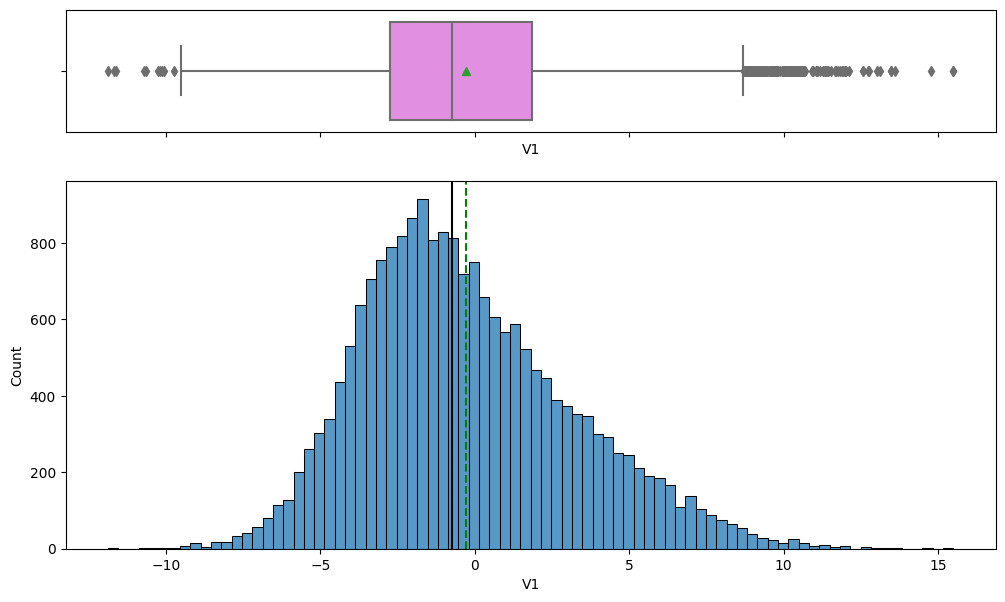

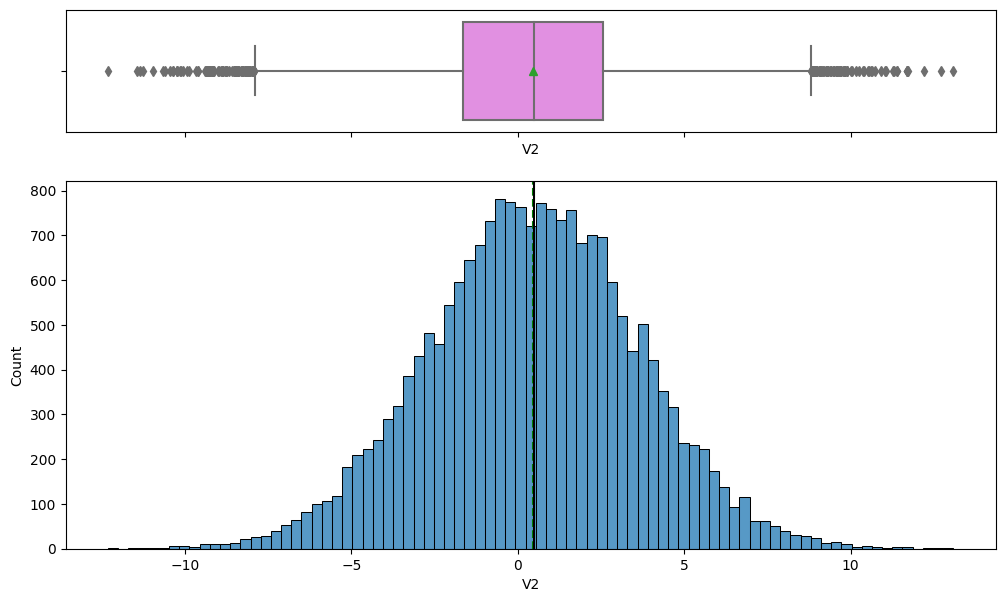

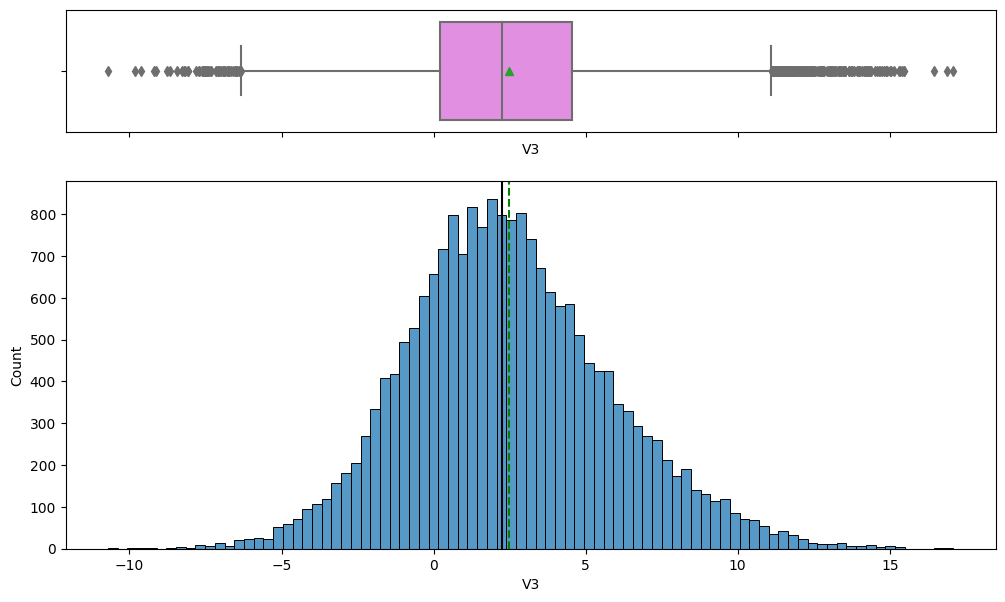

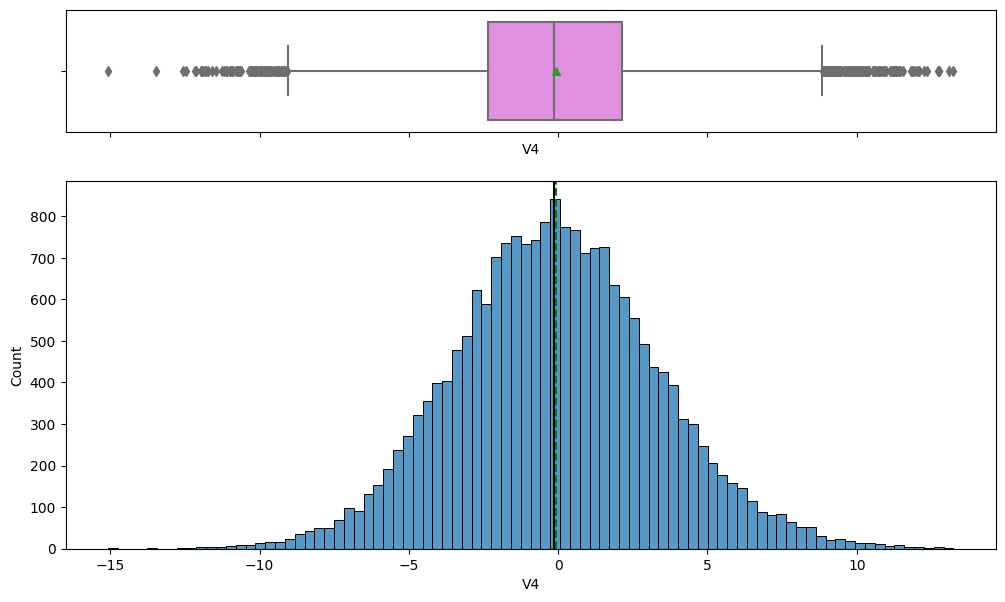

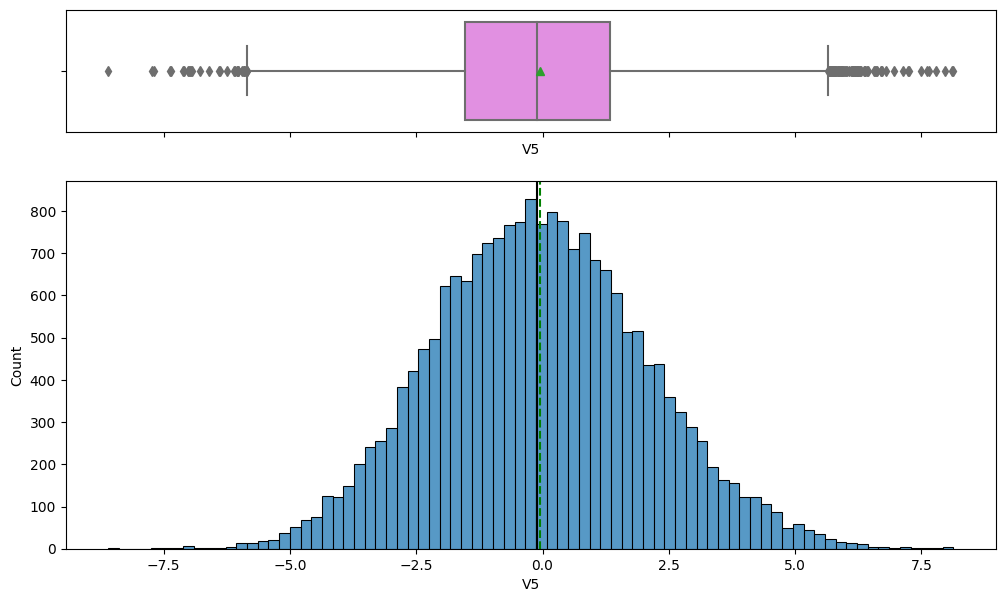

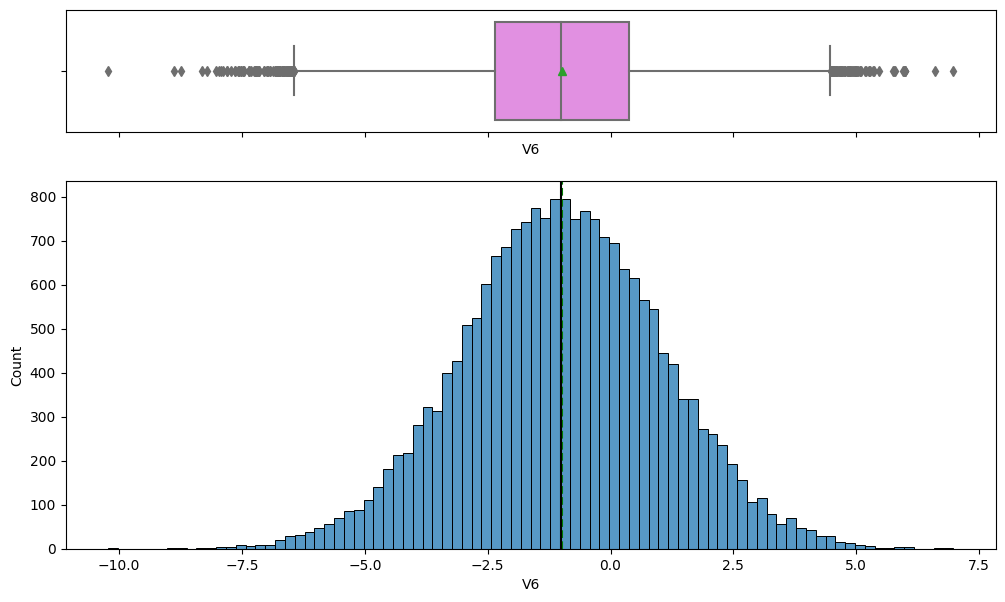

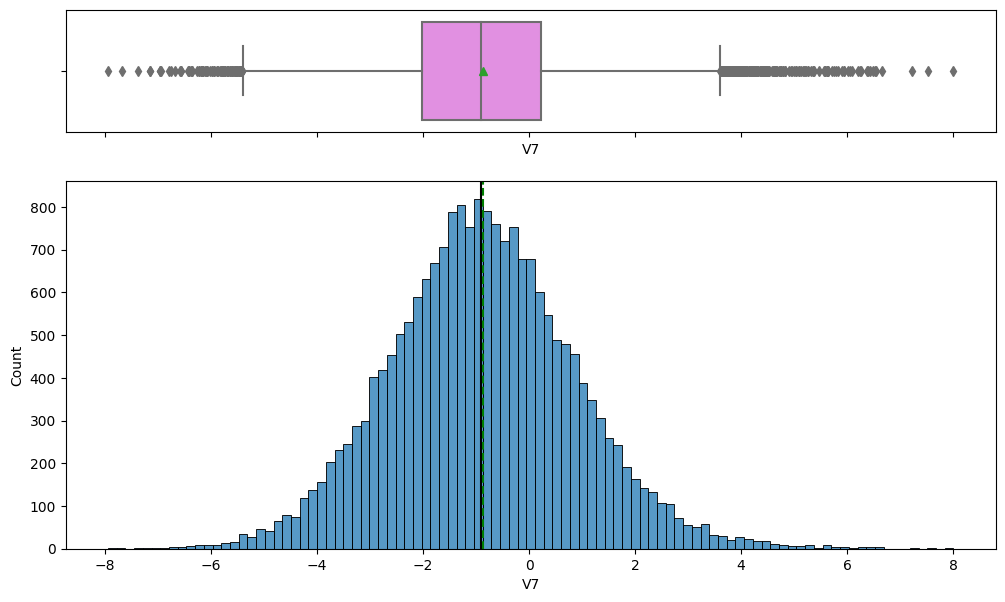

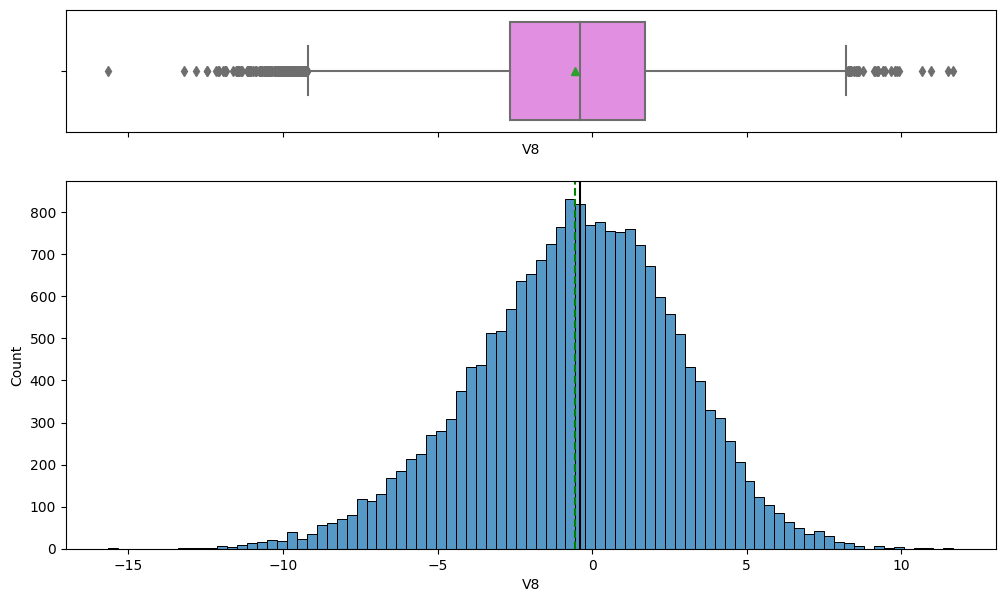

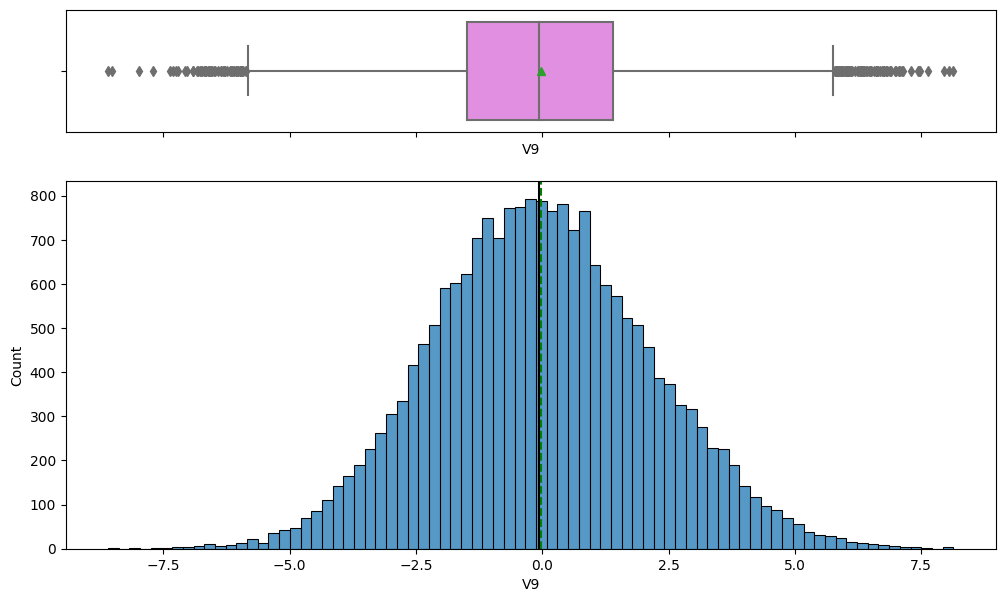

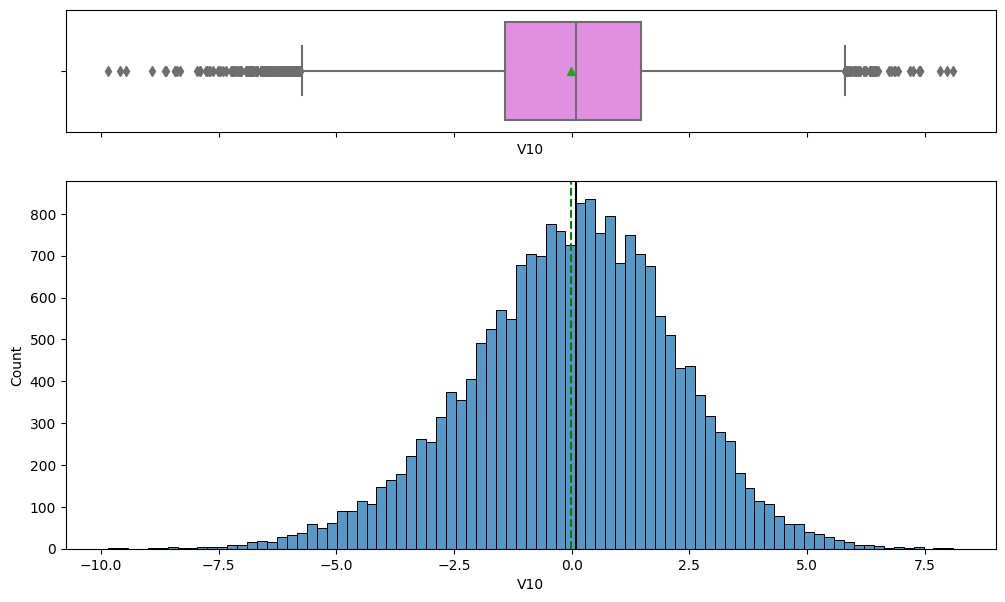

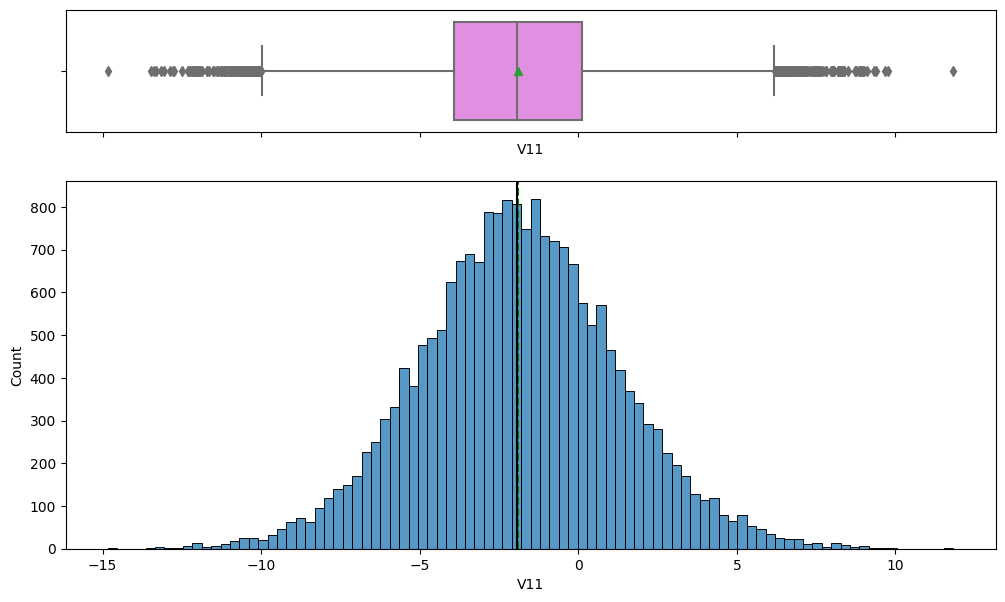

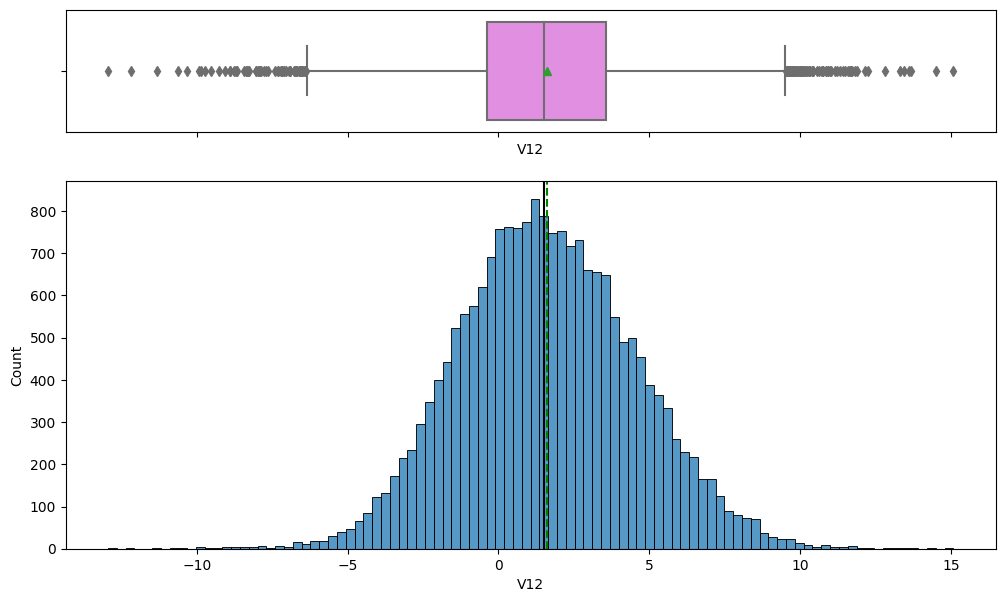

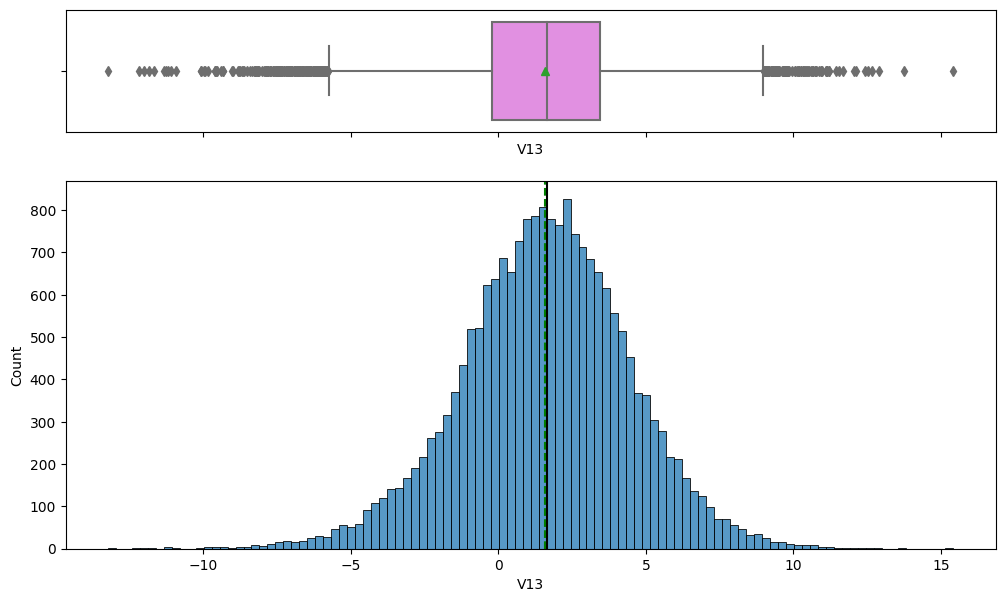

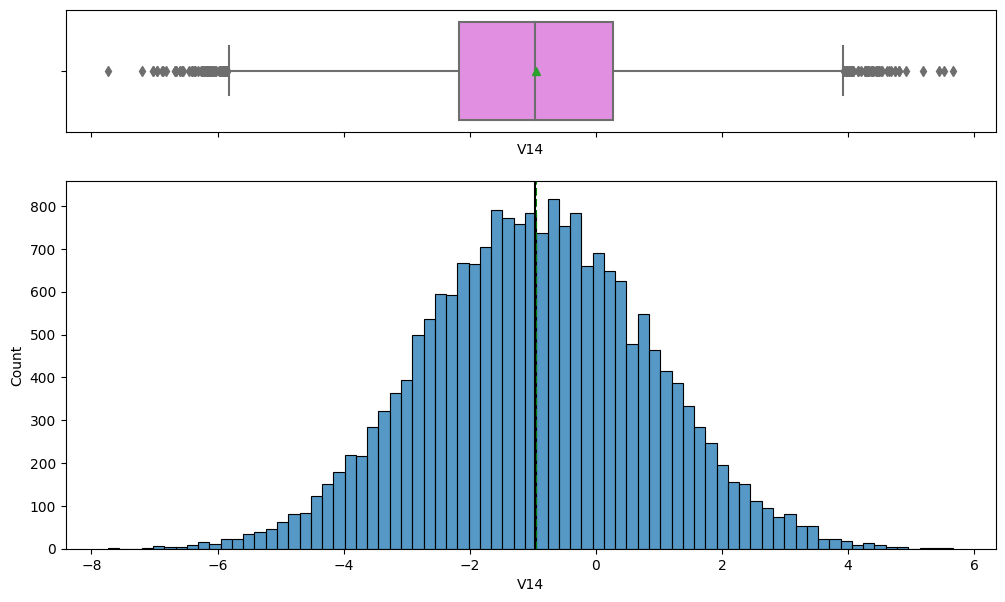

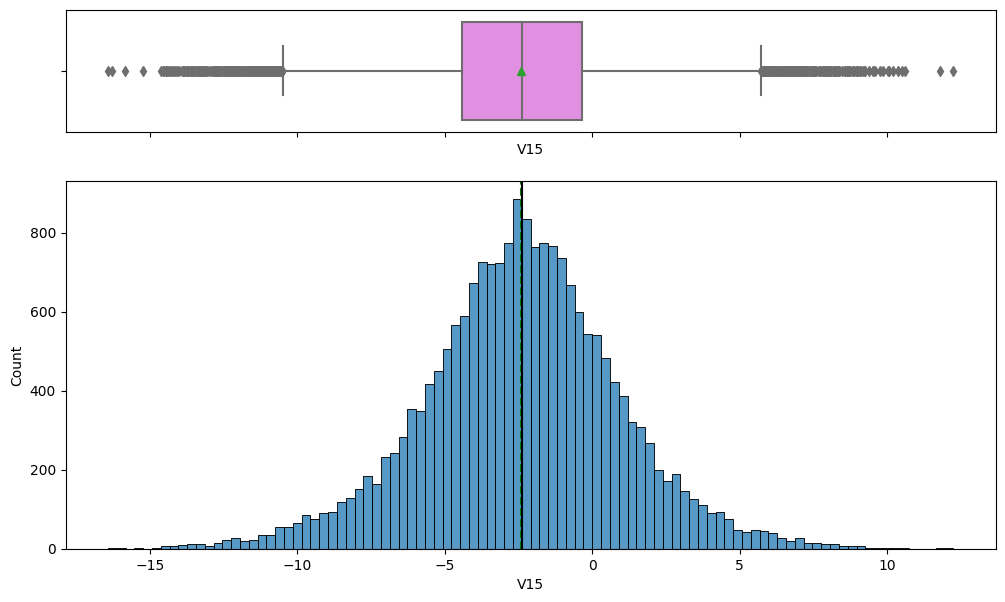

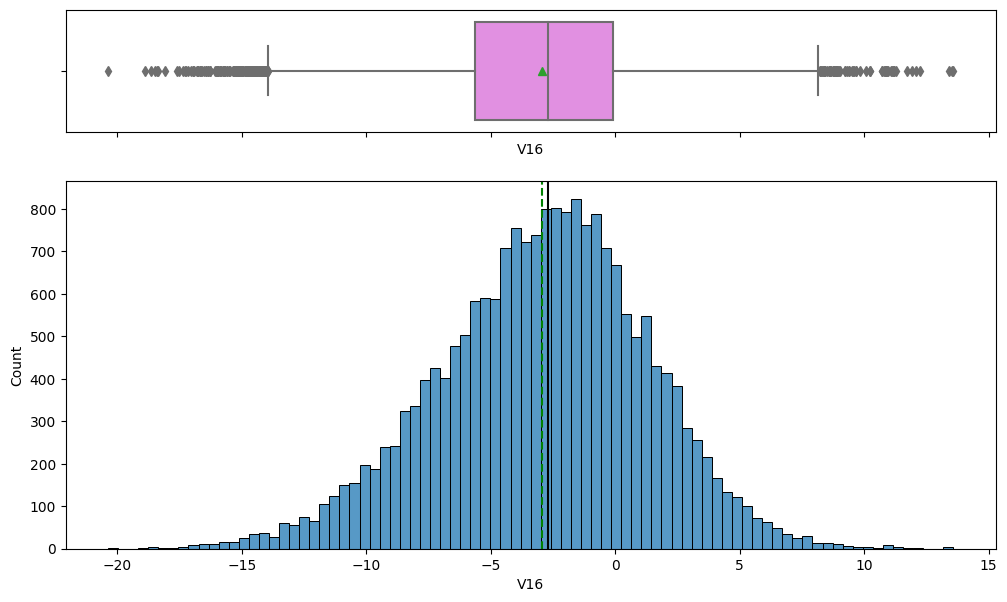

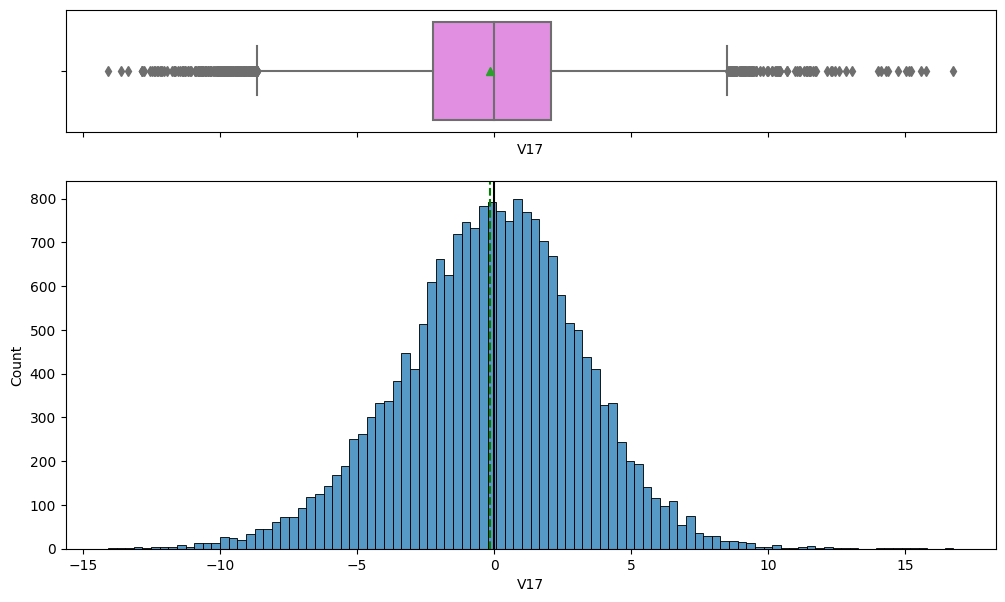

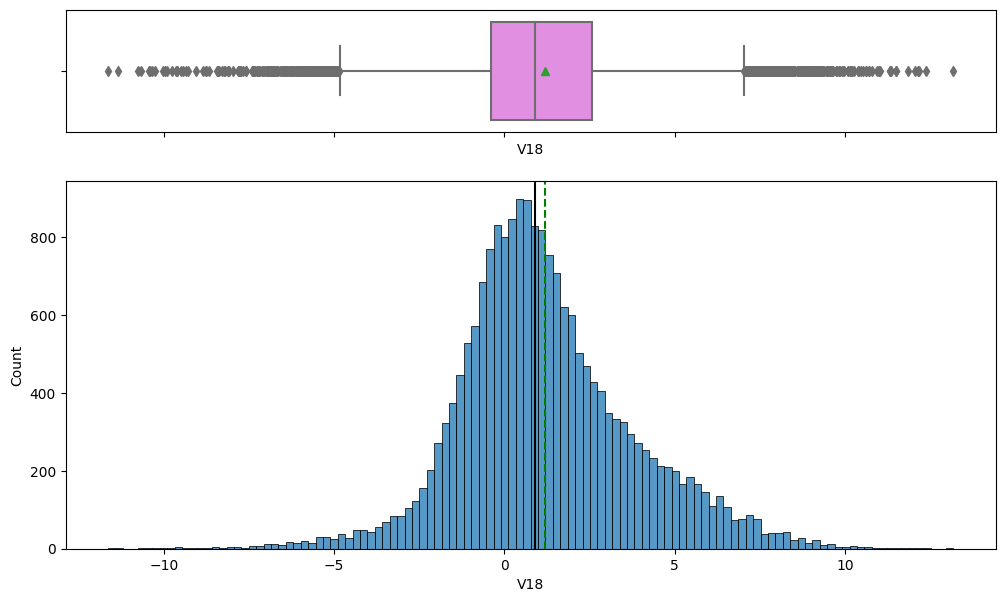

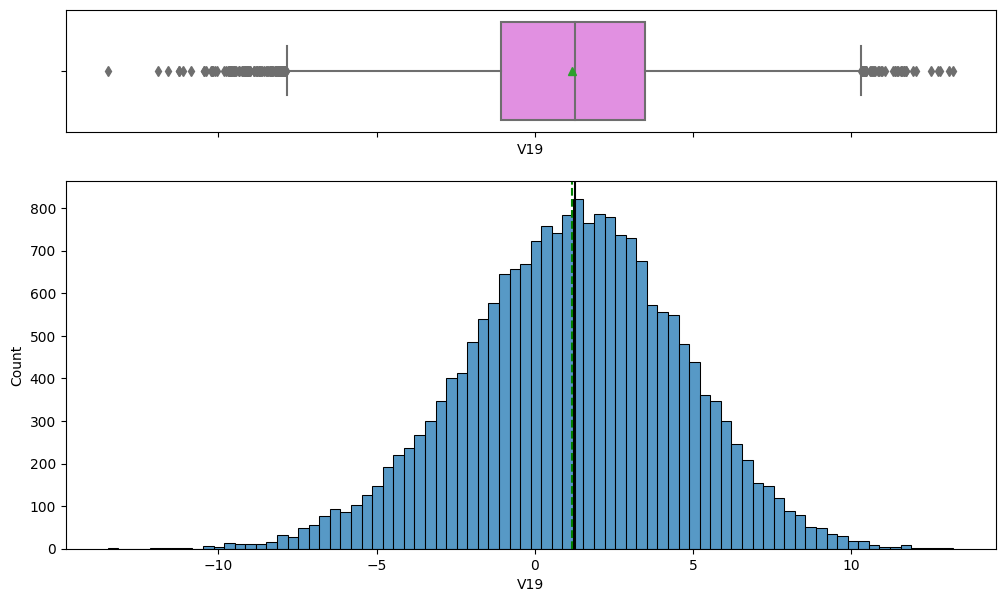

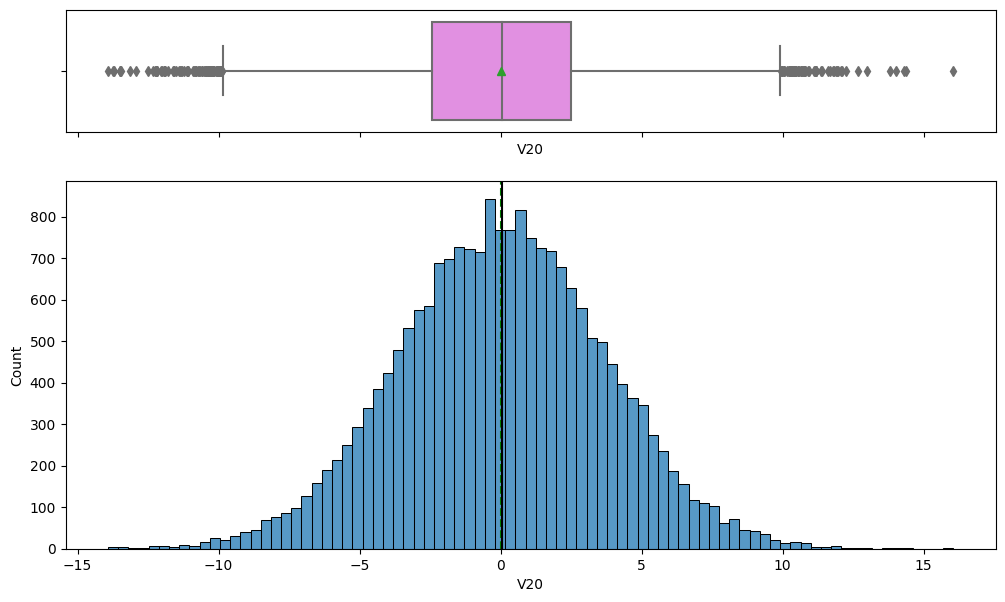

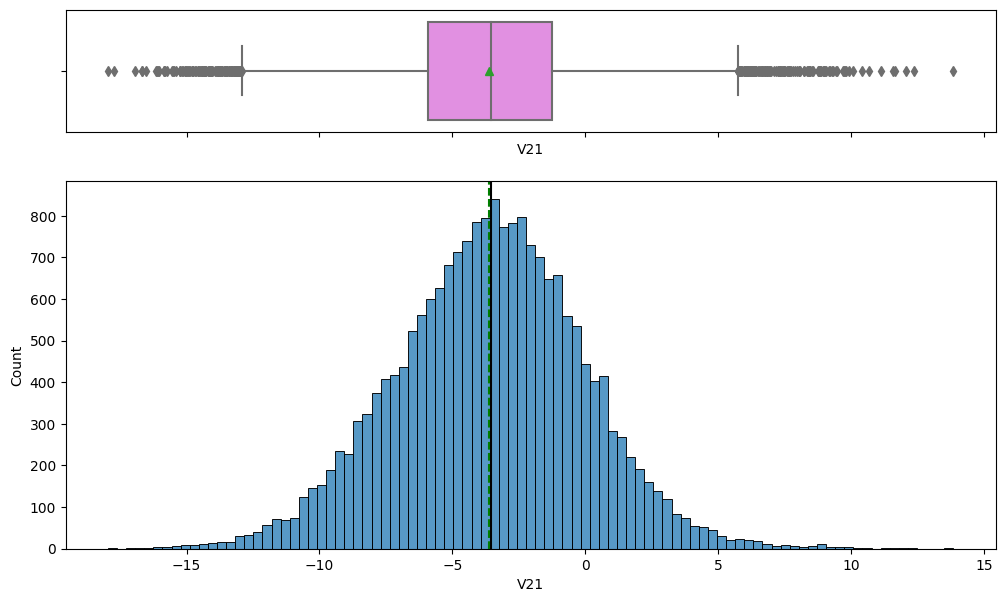

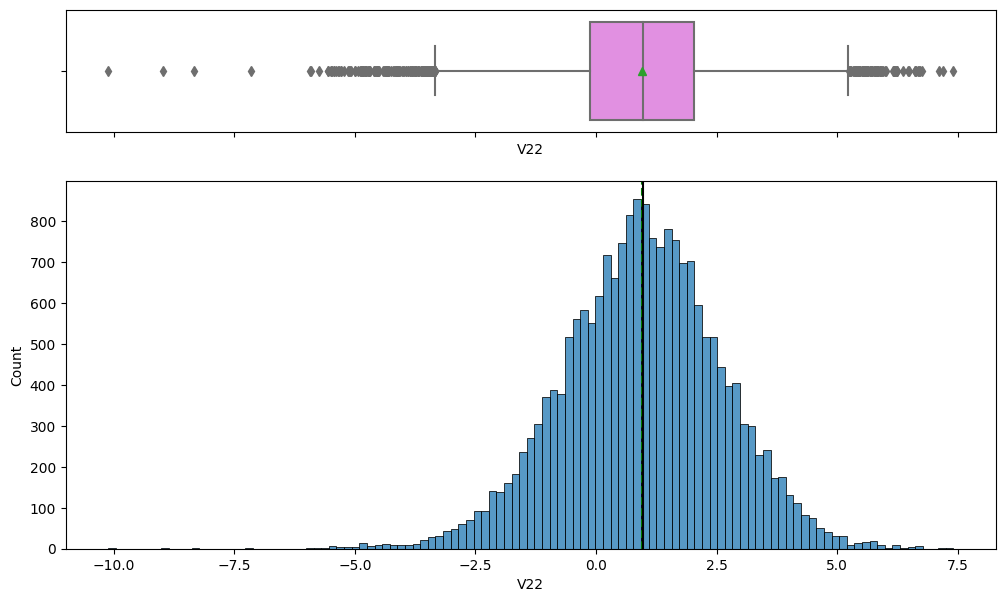

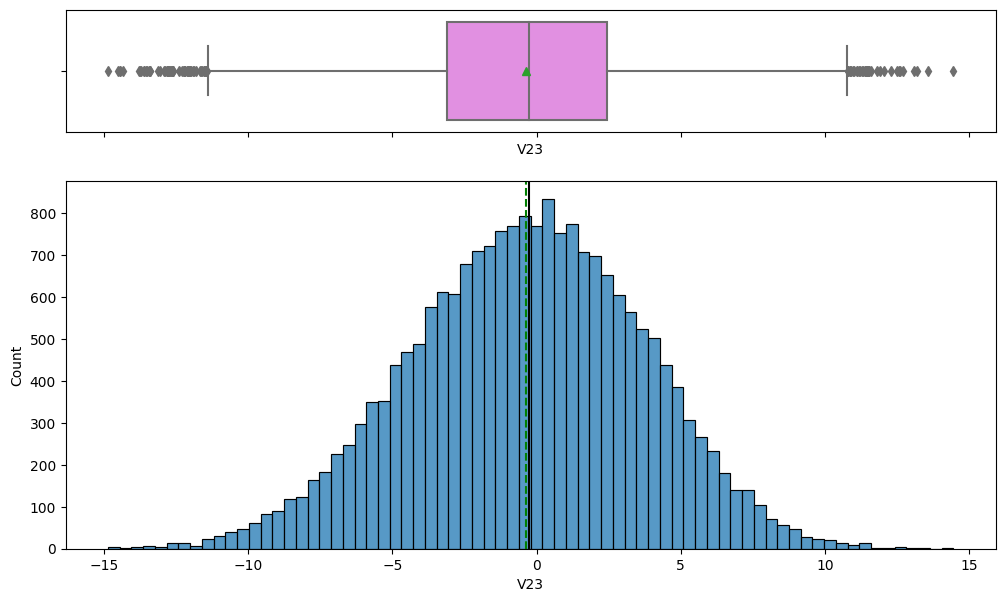

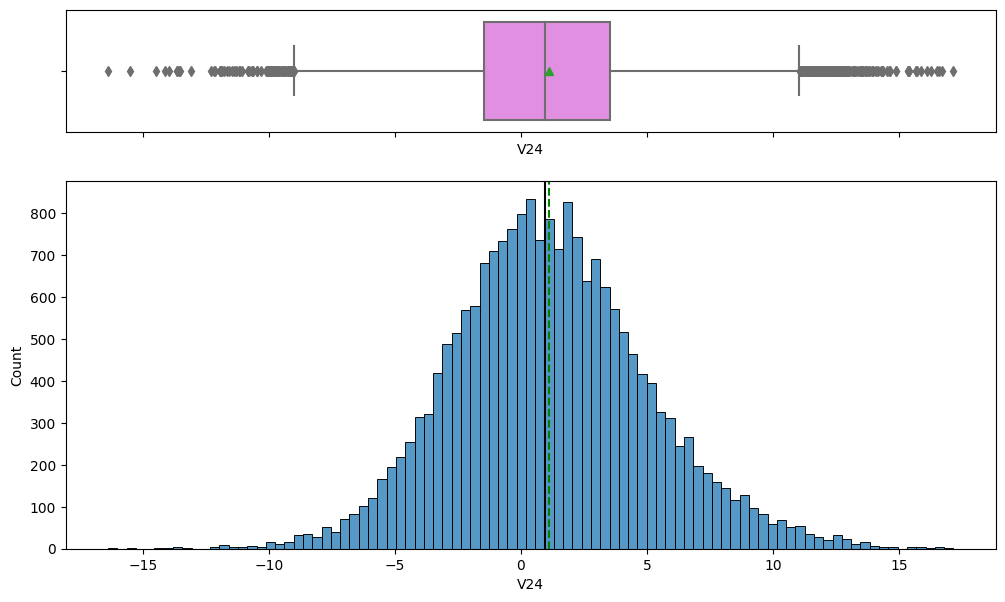

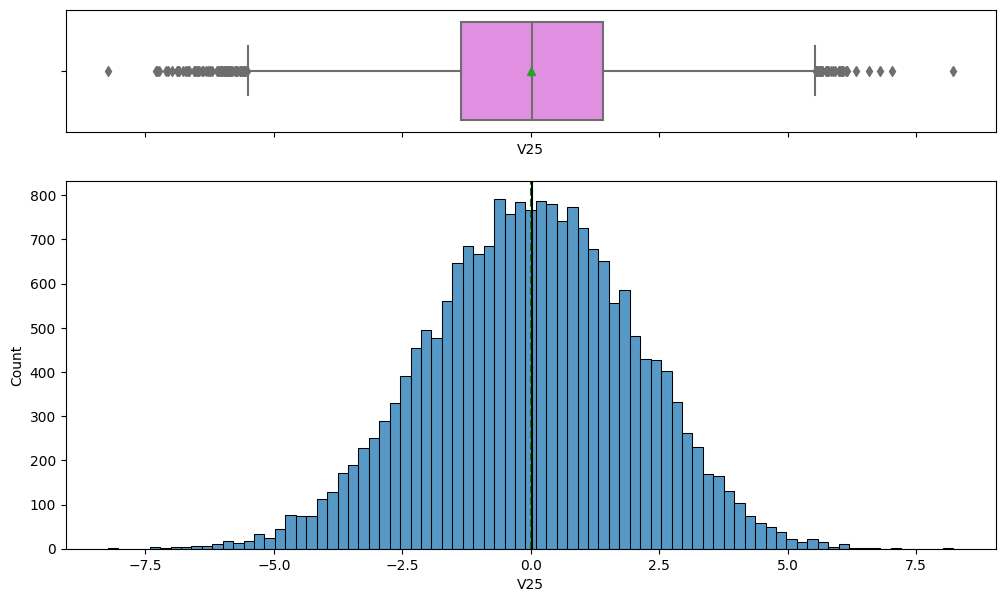

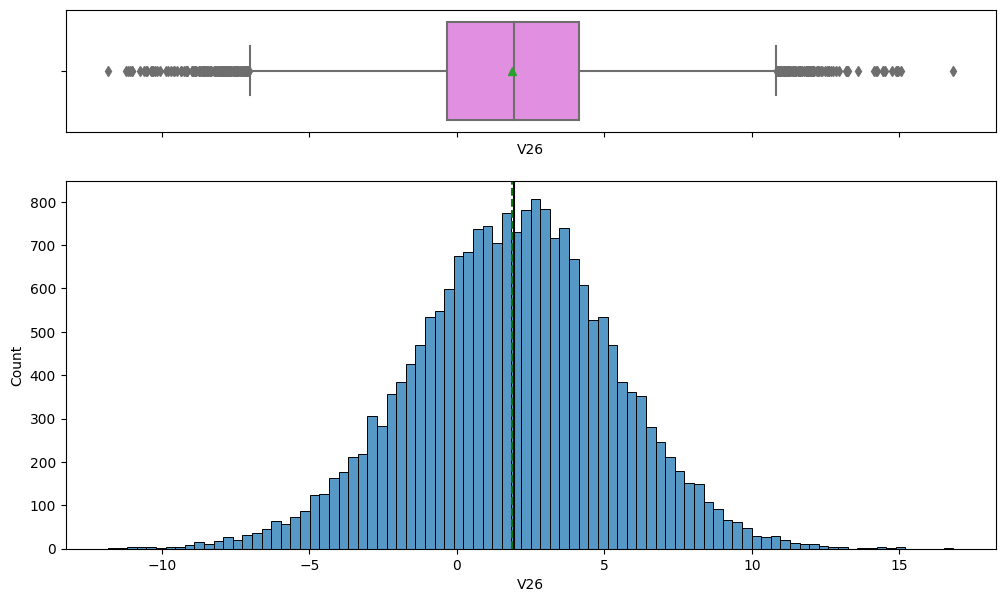

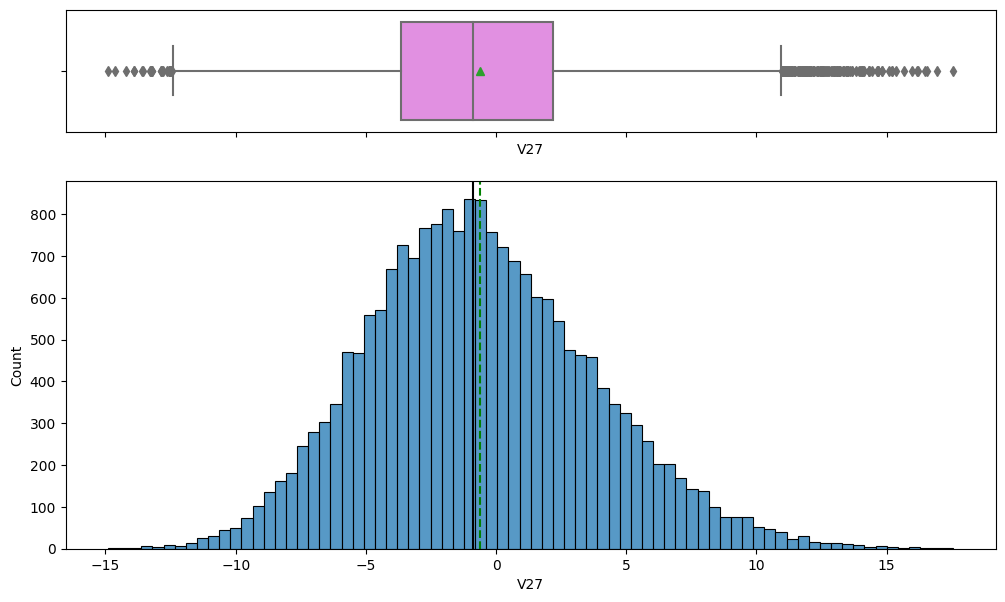

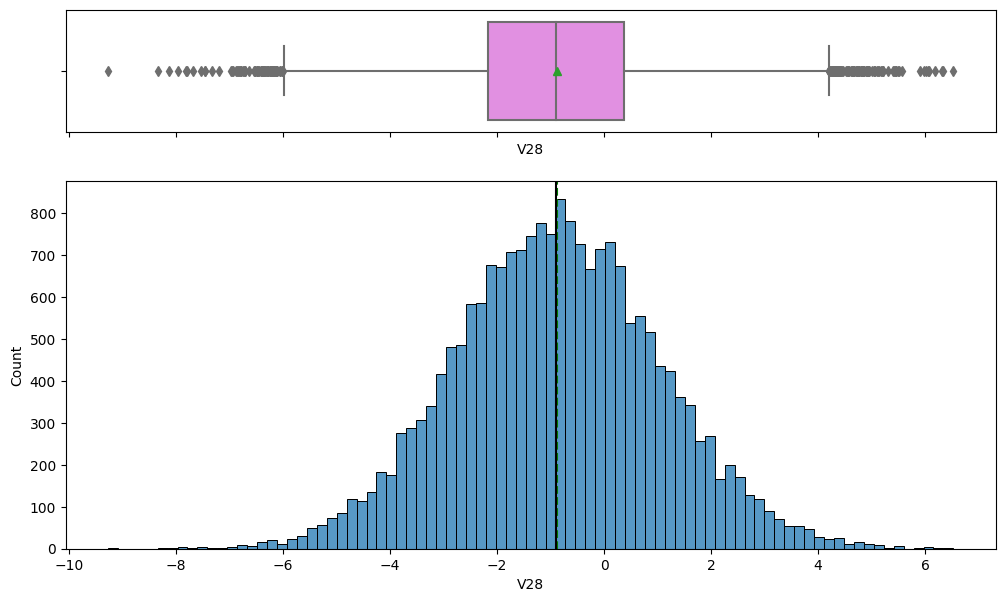

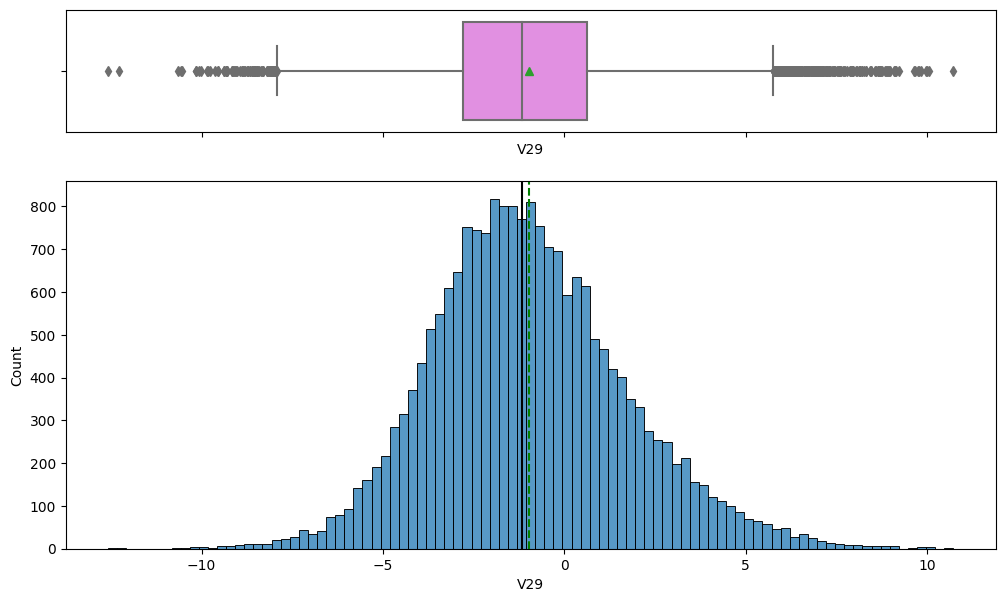

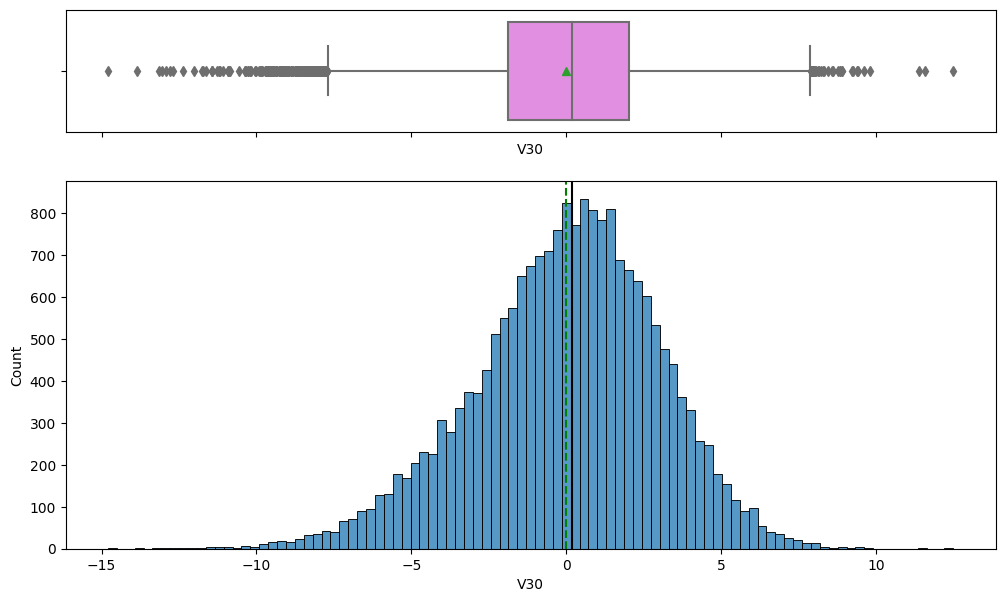

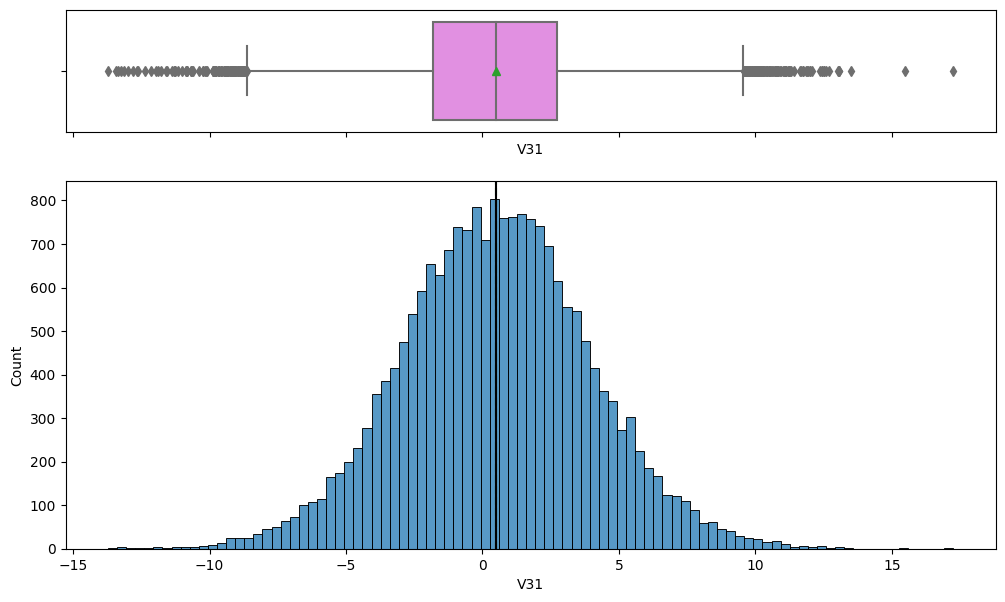

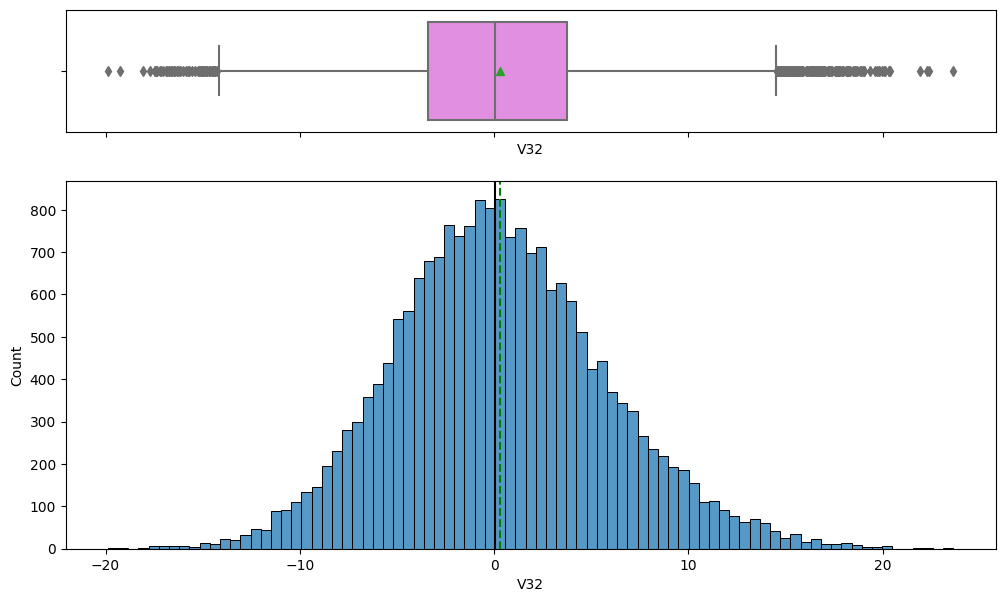

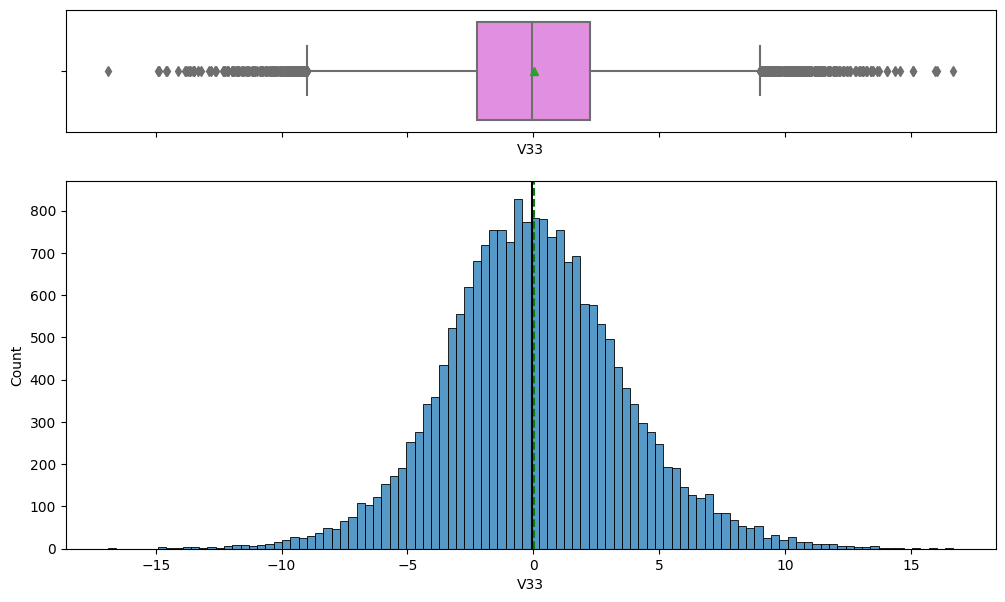

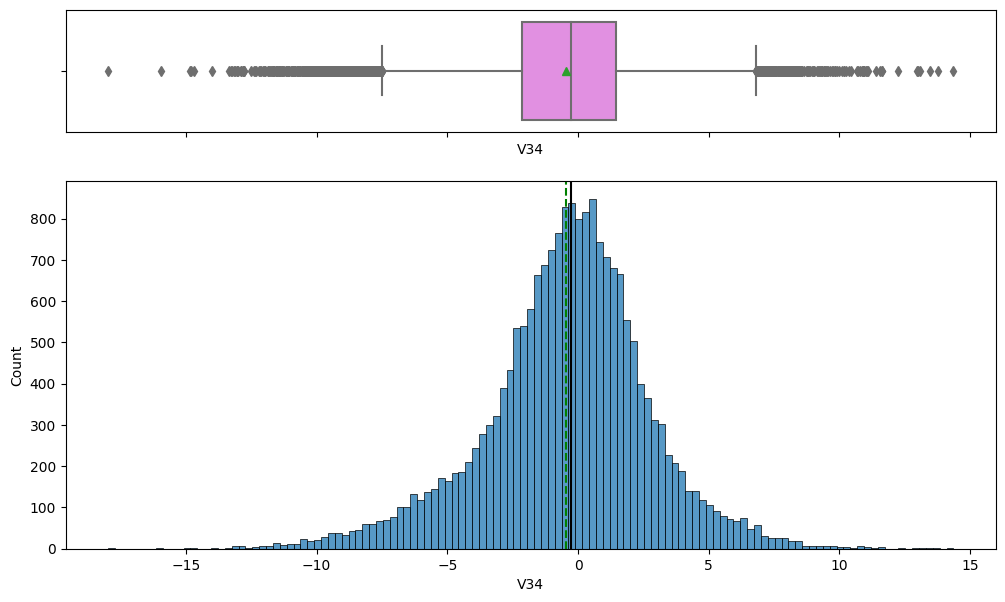

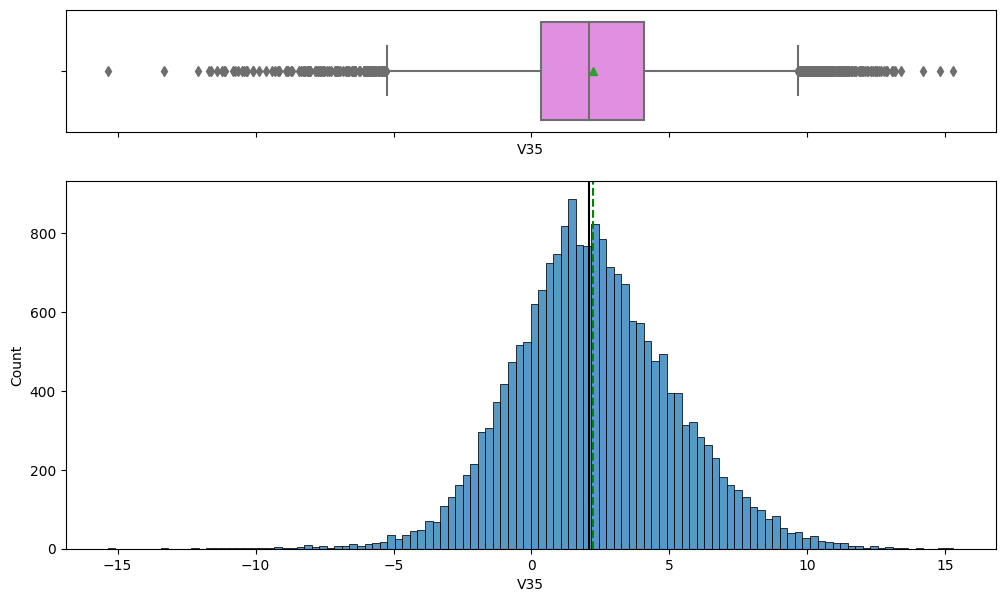

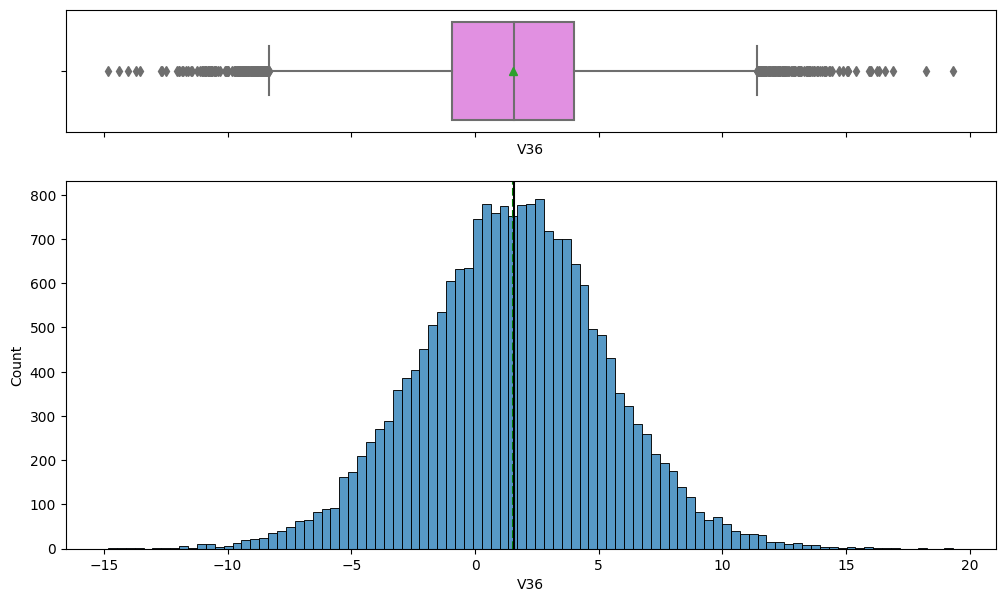

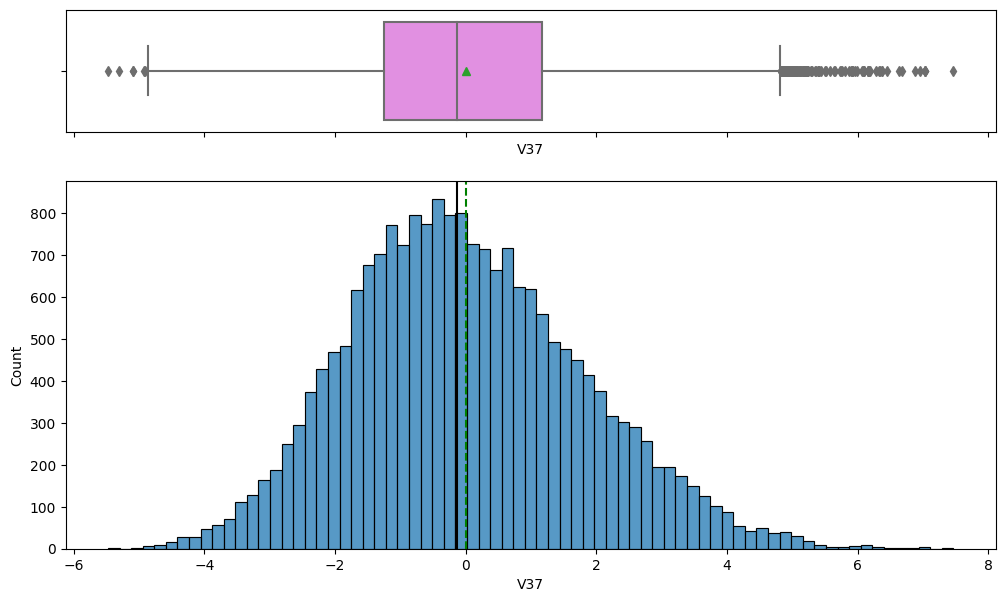

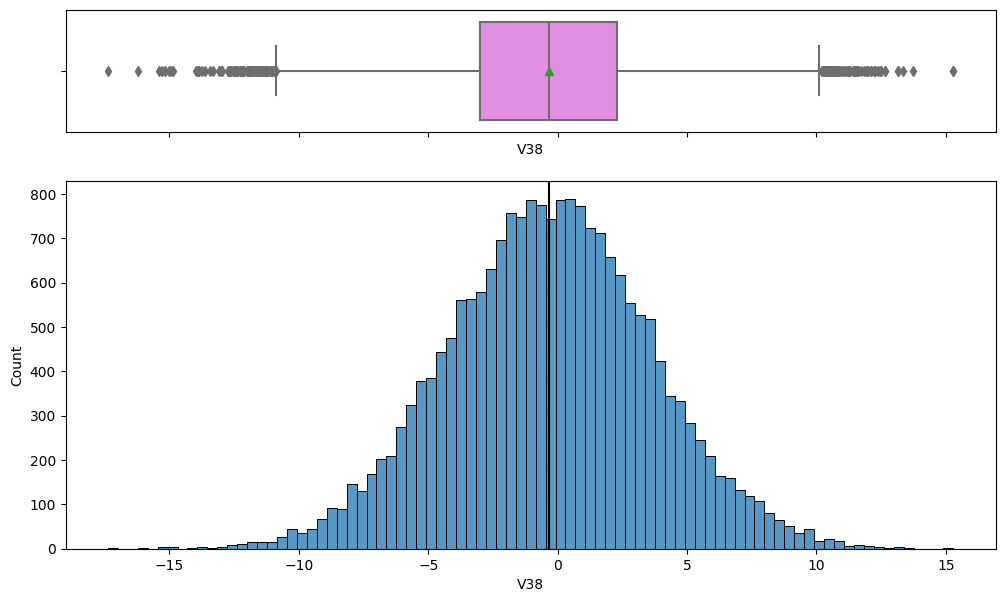

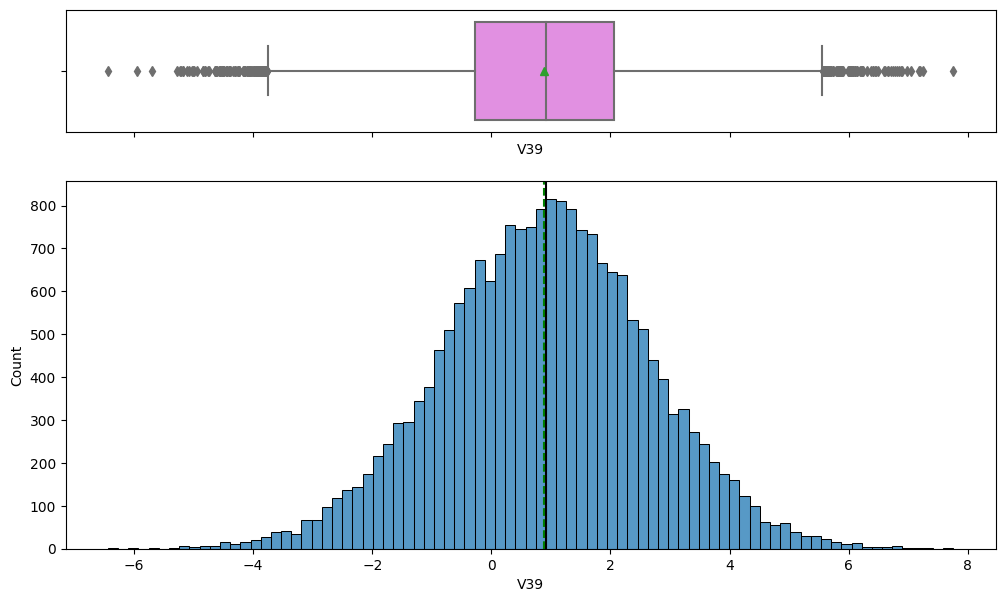

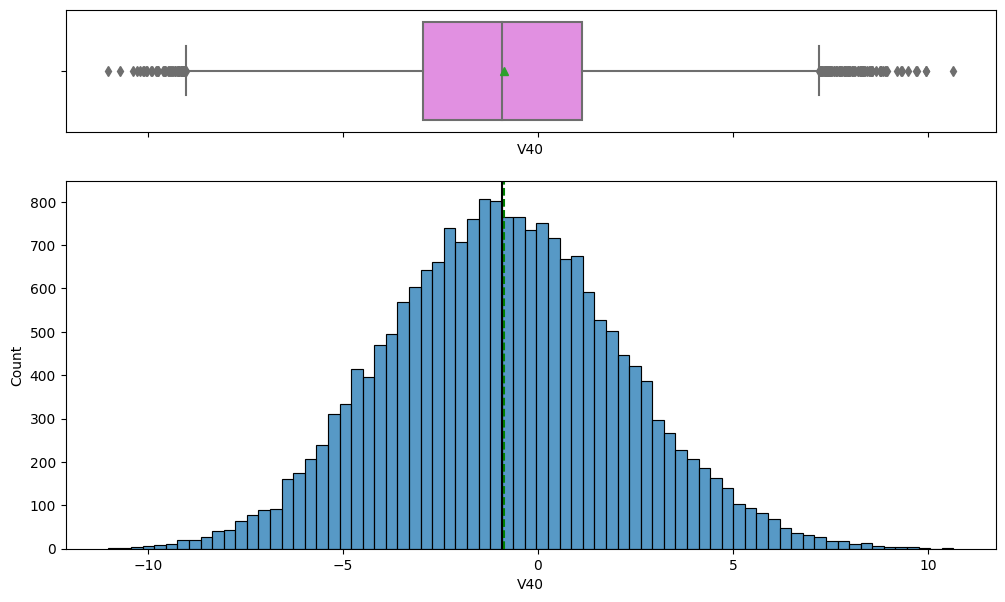

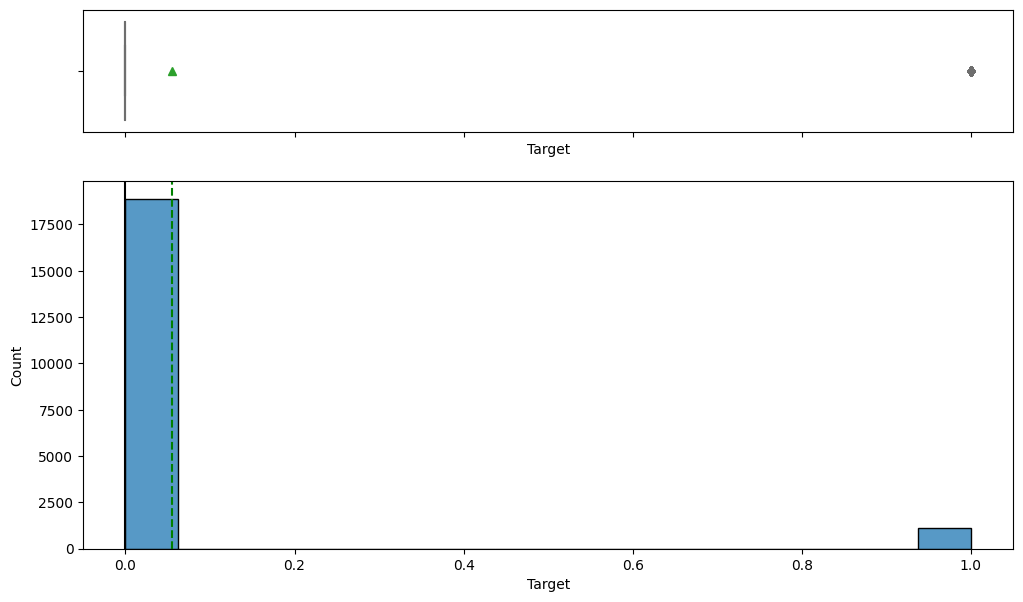

In [ ]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

**Observations of Variables**
- Distributions of variables are all approximately normal
  - V1, V18, V27, V29, V37 are very slightly skewed right
  - V8, V10, V16, V30, V34 are very slightly skewed left
- All the distributions have upper and lower outliers
 - V1, V27, 37 has more upper outliers
 - V8, V10, V19, V30 has more lower outliers
 - V22 lower outliers have big gaps for a few of the data
 - V35 lower outliers are more spread out compared to upper
- The ranges for the variables range from ~13 to ~43
  - V32 has the largest range for the variables at ~43.5
  - V37 has the smallest range for the varialbes at ~12.9
- Standard Deviation spreads from 1.65 to 5.5
  - V32 has largest st. dev. at ~5.5
  - V22 has smallest st. dev at ~1.65
- The mean for the variables spread out from ~-3 to ~2.5
  - V3 has largest mean of ~2.485
  -V16 has smallest mean of ~-2.925




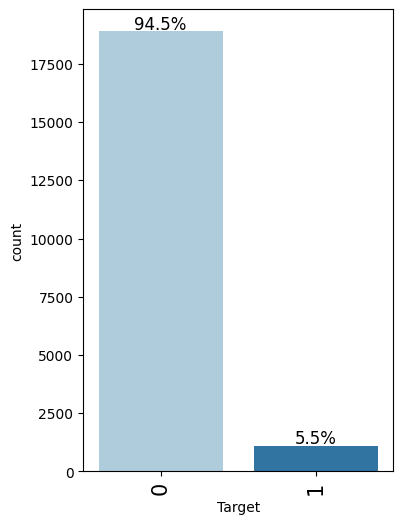

0    18890
1     1110
Name: Target, dtype: int64

In [ ]:
labeled_barplot(data, 'Target', perc=True)
data['Target'].value_counts()

- There were 1110 failing generators making ~5.5%
- ~94.5% of the generators do not fail

### Heatmap of Variables

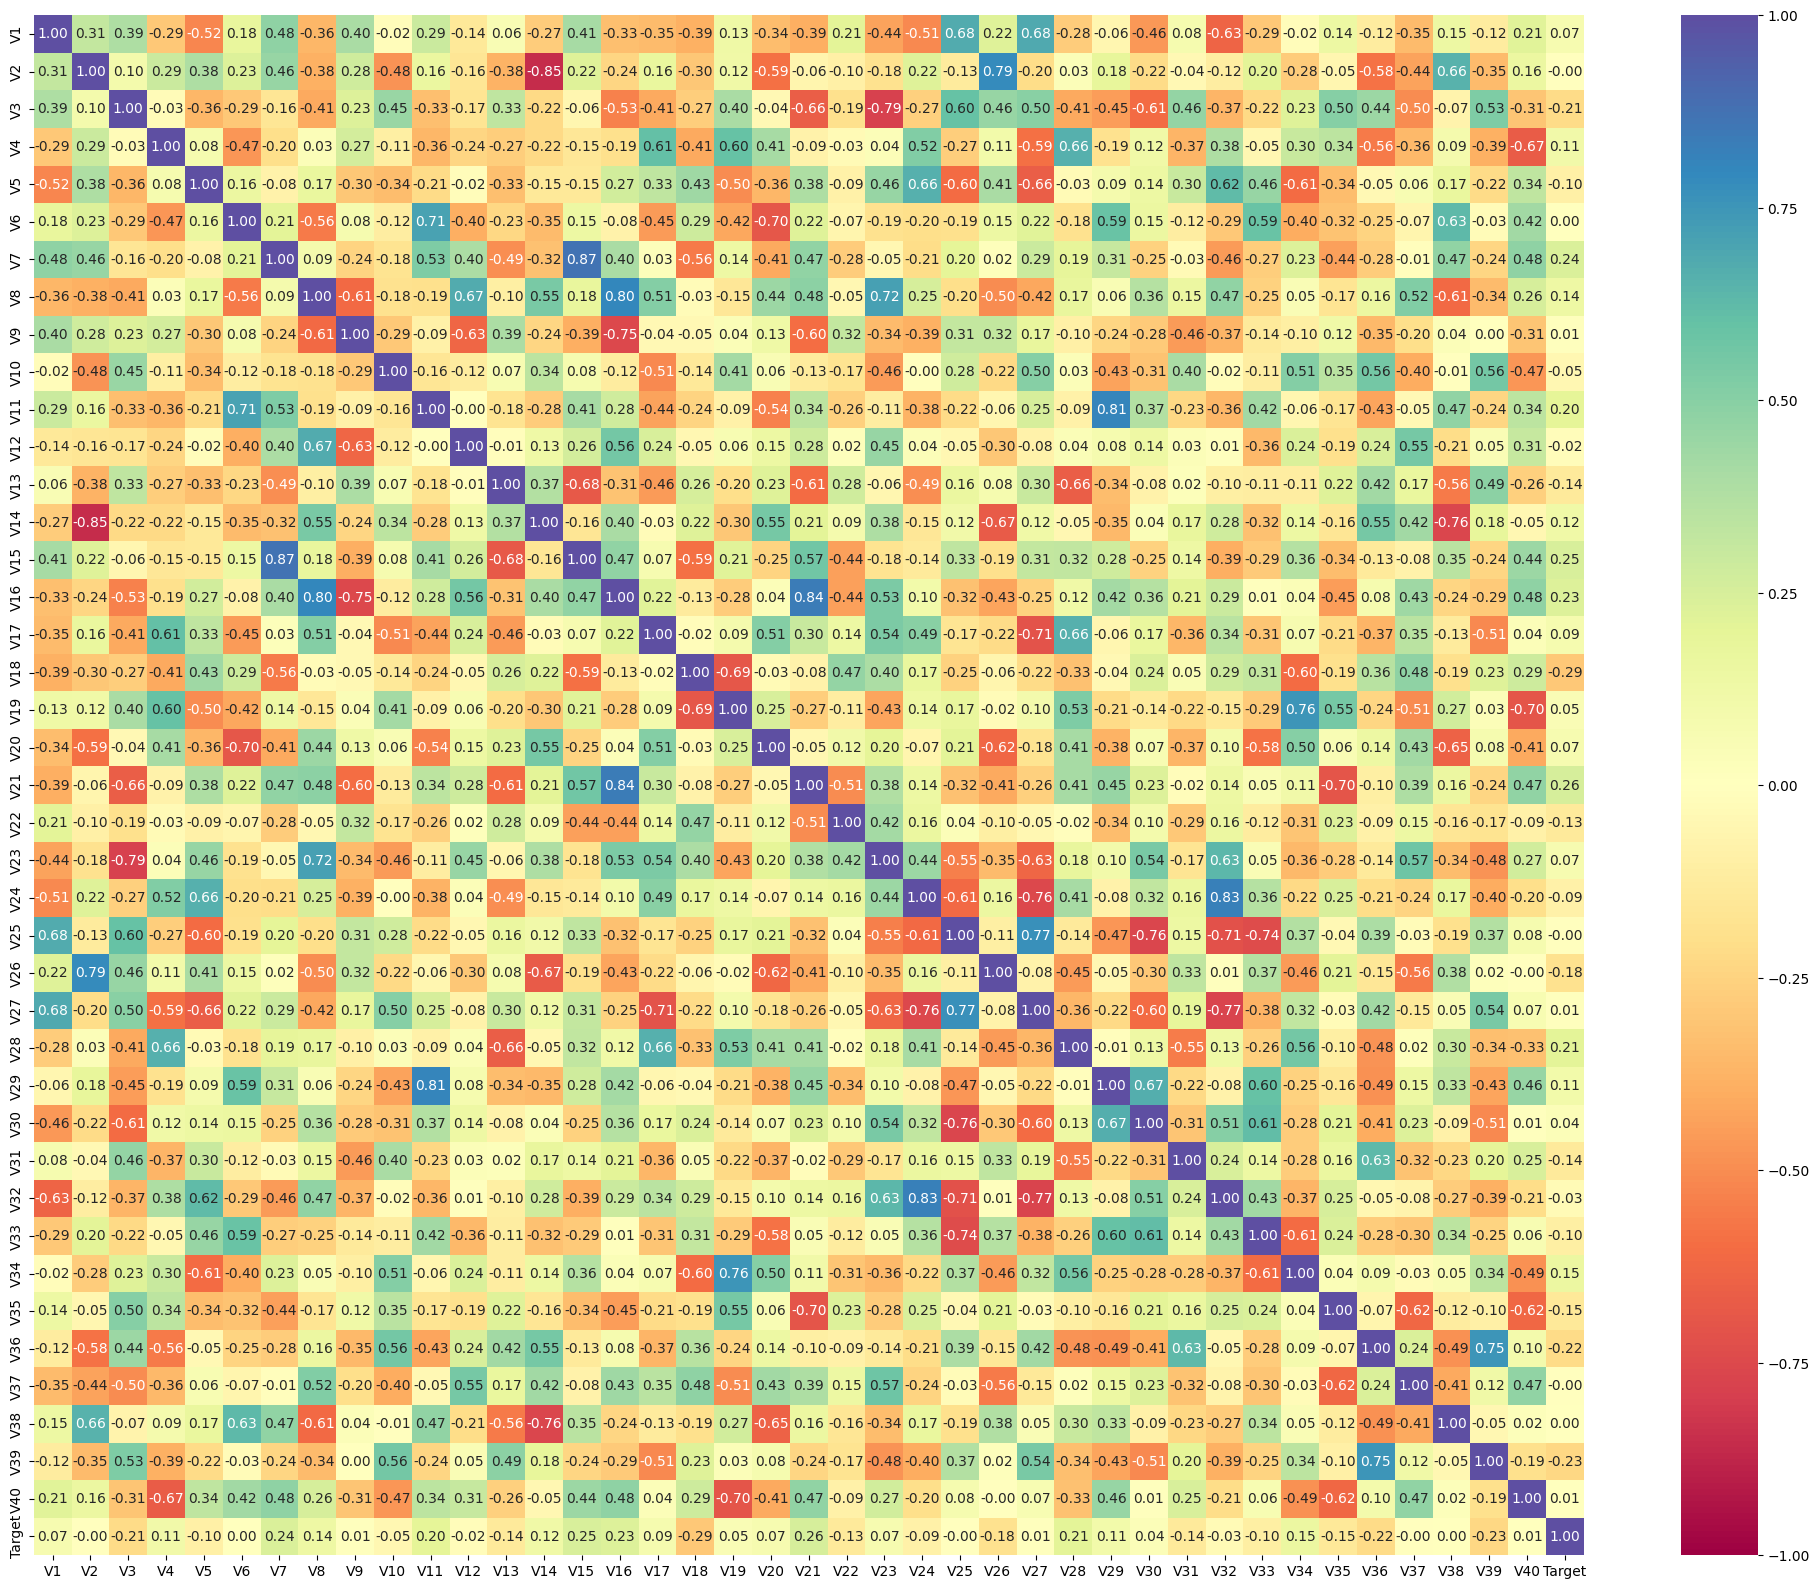

In [ ]:
#Creating heatmap of attributes
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

- There is a strong(>=.8) negative correlation between
  - V2 and V14
- There is a moderately strong(.7 <= x < .8) negative correlation between
  - V23 and V3, V20 and V6, V9 and V16, V27 and V17, V27 and V24, V30 and V25, V32 and 27, V32 and V25, V33 and V25, V35 and V21, V38 and V14, V40 and V1
- There is a strong(>=.8) positive correlation between
  - V7 and V15, V8 and V16, V21 and V16, V29 and V11, V32 and V24
- There is a moderately strong(.7 <= x < .8) positive correlation between
  - V2 and V26, V11 and V6, V8 and V23, V27 and V25, V34 and V19, V39 and V36

With the Target variable
- V18 has the greatest correlation with the Target variable which is a weak negative correlation of -.29
- V21 has the next largest correlation with the Target variable which is a weak positive correlation of .26

## Data Pre-processing

### For Training Set

In [ ]:
#Seperating target variable (dependent) from other variables
X = data.drop(['Target'], axis=1)
y = data["Target"]

In [ ]:
#Splitting training dataset into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
# Making sure there are the same number of columns in test and training sets and looking at percentages in each
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Percentage of classes in Training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Validation set:")
print(y_val.value_counts(normalize=True))

Shape of Training set :  (14000, 40)
Shape of Validation set :  (6000, 40)
Percentage of classes in Training set:
0   0.944
1   0.056
Name: Target, dtype: float64
Percentage of classes in Validation set:
0   0.945
1   0.055
Name: Target, dtype: float64


- Data from all the training set before the split into training and validation for failure (1) was approximately ~5.6%. After the split occured the same percentage for failure (1) is still ~5.6% for the training and validation sets.

###For Test Set

In [ ]:
#Seperating target variable (dependent) from other variables
X_test = data_test.drop(['Target'], axis=1)
y_test = data_test["Target"]

# Do not have to split the test set becasue it will only be used for testing

In [ ]:
# Making sure there are the same number of columns in test set as traing set
print("Shape of Test set : ", X_test.shape)
# looking at percentage to see if it is close to the same, even though it may not
print("Percentage of classes in Test set:")
print(y_test.value_counts(normalize=True))

Shape of Test set :  (5000, 40)
Percentage of classes in Test set:
0   0.944
1   0.056
Name: Target, dtype: float64


- Data from the test set has the same number of column, and the percentage of the target variable is about the same.  Which in application might not be because of outside factors, but in this case it is similar.

## Missing value imputation




In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

- There are now no missing values in any of the data sets

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Logistic regression: 0.5121754042136208
Bagging: 0.7080597746202841
Random forest: 0.7311448636289402
GBM: 0.7004246284501063
Adaboost: 0.6299771353911481
Xgboost: 0.809194839131145
dtree: 0.7375142903805324

Validation Performance:

Logistic regression: 0.44680851063829785
Bagging: 0.7051671732522796
Random forest: 0.7082066869300911
GBM: 0.6838905775075987
Adaboost: 0.5805471124620061
Xgboost: 0.7993920972644377
dtree: 0.7173252279635258


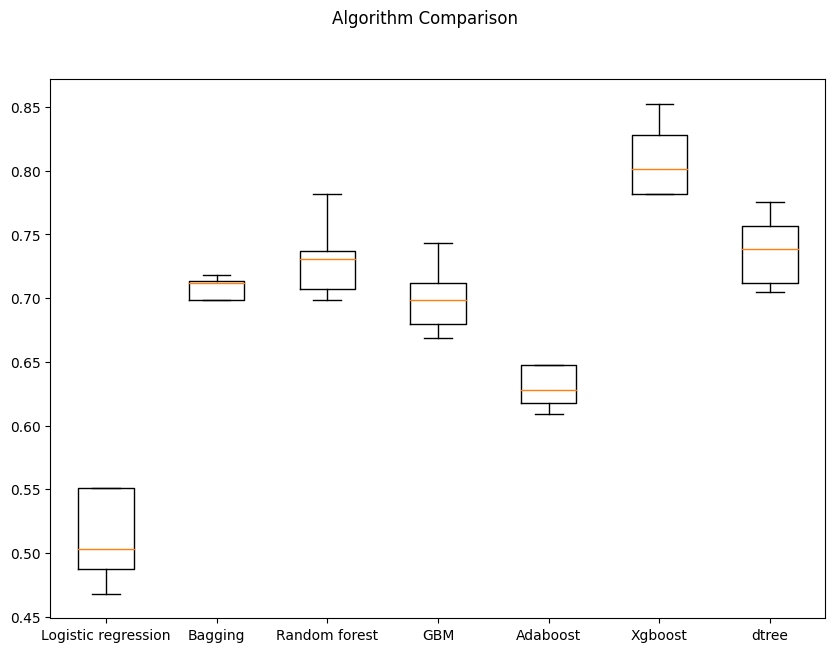

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- XGBoost is giving the highest cross-validated recall, followed by the decision tree, and then the Random Forest
- XGBoost minimum value appears to be greater than all other cross-validation scores of the other models
- XGBoost median score of cross-validation scores is ~81%
- Bagging has the least variability amongst it's cross-validation scores
- XGBoost had a cross-validation score for recall of ~80 and a validation recall score of ~80, so this model is a candidate to be tuned to get even better performance

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 781
Before Oversampling, counts of label 'No': 13219 

After Oversampling, counts of label 'Yes': 13219
After Oversampling, counts of label 'No': 13219 

After Oversampling, the shape of train_X: (26438, 40)
After Oversampling, the shape of train_y: (26438,) 



In [ ]:
models1 = []  # Empty list to store all the models

# Appending models into the list
models1.append(("Logistic regression", LogisticRegression(random_state=1)))
models1.append(("Bagging", BaggingClassifier(random_state=1)))
models1.append(("Random forest", RandomForestClassifier(random_state=1)))
models1.append(("GBM", GradientBoostingClassifier(random_state=1)))
models1.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models1.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models1.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names1 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Oversampling: Cross-Validation performance on training dataset:" "\n")

for name, model in models1:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names1.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Oversampling: Validation Performance:" "\n")

for name, model in models1:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Oversampling: Cross-Validation performance on training dataset:

Logistic regression: 0.8792647263373178
Bagging: 0.9770028213709836
Random forest: 0.9832058879591166
GBM: 0.9232918799580773
Adaboost: 0.8997650288519384
Xgboost: 0.9915274441149314
dtree: 0.971329541740435

Oversampling: Validation Performance:

Logistic regression: 0.8358662613981763
Bagging: 0.8115501519756839
Random forest: 0.8389057750759878
GBM: 0.8844984802431611
Adaboost: 0.8541033434650456
Xgboost: 0.8723404255319149
dtree: 0.78419452887538


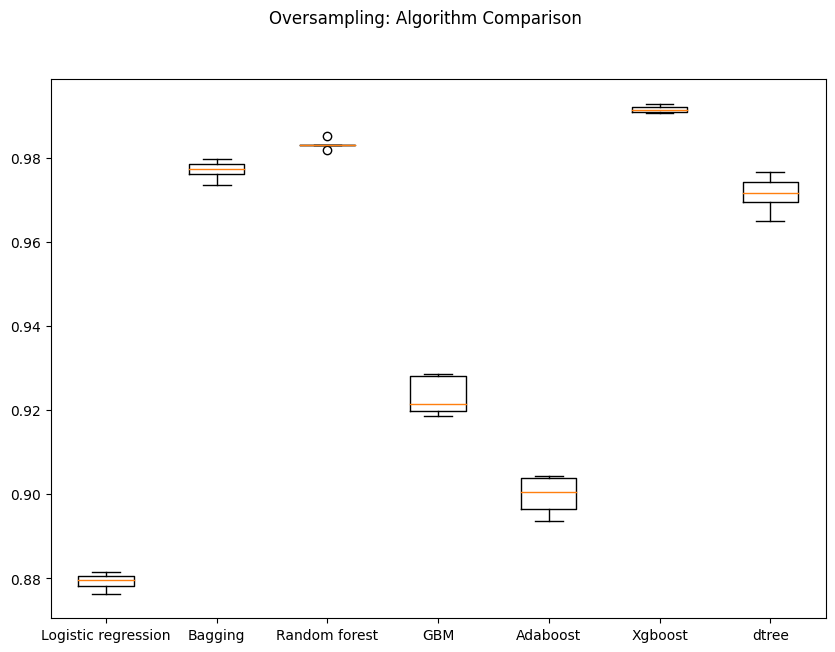

In [ ]:
# Plotting boxplots for CV scores of all Oversampling models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Oversampling: Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names1)

plt.show()

- XGBoost(~ 99%) is giving us the higest corss-validated recall, followed by Random Forest(~ 98%) and Bagging(~ 98%). All three of these models are overfitting with validations scores of ~87, ~84, and ~81 respectively.  
- All of these models cross-validated scores are consistent
- GBM model cross-validated score of ~92, and a cross validation score of ~88(highest validation score), overfitted a little, but does well.  
- These four models are candidates to be tuned, the first three to try to limit overfitting, and then with GBM trying to improve the recall with keeping minimum overfitting.

### Model Building with Undersampled data

In [ ]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# RandomUnderSampler for undersampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_under == 0)))


print("After Undersampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Undersampling, counts of label 'Yes': 781
Before Undersampling, counts of label 'No': 13219 

After Undersampling, counts of label 'Yes': 781
After Undersampling, counts of label 'No': 781 

After Undersampling, the shape of train_X: (1562, 40)
After Undersampling, the shape of train_y: (1562,) 



In [ ]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(("Logistic regression", LogisticRegression(random_state=1)))
models2.append(("Bagging", BaggingClassifier(random_state=1)))
models2.append(("Random forest", RandomForestClassifier(random_state=1)))
models2.append(("GBM", GradientBoostingClassifier(random_state=1)))
models2.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models2.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models2.append(("dtree", DecisionTreeClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Undersampling: Cross-Validation performance on training dataset:" "\n")

for name, model in models2:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names2.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Undersampling: Validation Performance:" "\n")

for name, model in models2:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Undersampling: Cross-Validation performance on training dataset:

Logistic regression: 0.8476400457292177
Bagging: 0.8565817409766454
Random forest: 0.8872856442920136
GBM: 0.8834313245141271
Adaboost: 0.8642087212150906
Xgboost: 0.8936714029070716
dtree: 0.8488731014208721

Undersampling: Validation Performance:

Logistic regression: 0.8358662613981763
Bagging: 0.8480243161094225
Random forest: 0.8814589665653495
GBM: 0.8905775075987842
Adaboost: 0.8541033434650456
Xgboost: 0.8966565349544073
dtree: 0.8389057750759878


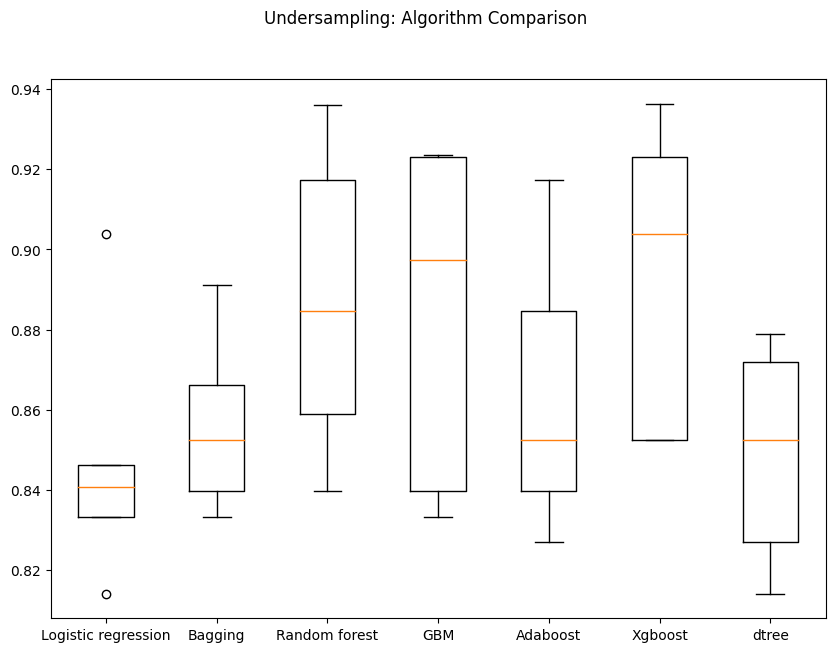

In [ ]:
# Plotting boxplots for CV scores of all Undersampling models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Undersampling: Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names2)

plt.show()

- XGBoost is givng the highest cross-validated recall score, followed by GBM and then Random Forest.
- These three cross-validated recall scores are also very similar to their validation score, showing they are not overfitting
- These models have more variablilty in the cross-validated recall scores compared to the Oversampling models
- These three models we will tune to try to improve the recall score while keeping the models not overfitting to the training set

## HyperparameterTuning

- We will tune these models to improve the Recall score and keep overfitting minimal
  - XGBoost with the original data
  - XGBoost, Random Forest, Bagging, and GBM with Oversampling
  - XGBoost, GBM, and Random Forest with Undersampling

### Tuning XGBoost with the original data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.8476400457292177:


In [ ]:
# building model with best parameters
XGBoost_orig = XGBClassifier(
    random_state=1,
    subsample= 0.8,
    scale_pos_weight= 10,
    n_estimators= 150,
    learning_rate= 0.1,
    gamma= 3
)

# Fit the model on training data
XGBoost_orig.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
XGBoost_orig_random_train = model_performance_classification_sklearn(
    XGBoost_orig, X_train, y_train
)
print("Training performance:")
XGBoost_orig_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.985,0.992


In [ ]:
# Calculating different metrics on validation set
XGBoost_orig_random_val = model_performance_classification_sklearn(XGBoost_orig, X_val, y_val)
print("Validation performance:")
XGBoost_orig_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.989,0.842,0.958,0.896


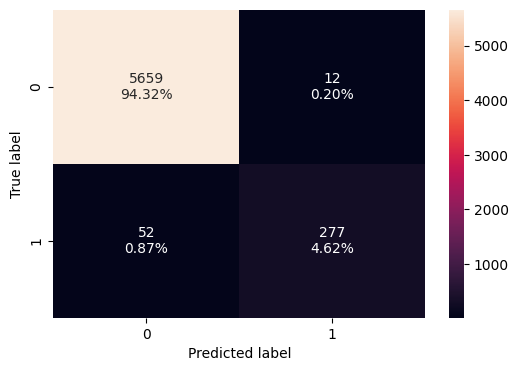

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGBoost_orig, X_val, y_val)

**Observations for Tuned XGBoost model**
- The tuned XGBoost has a recall score of 100%, yet on validation recall has a score of .84.  
- Both of the tuned scores are higher than the default, but the default didn't overfit like the tuned model.
  - Default recall .81, Default validation recall .8
  - Tuned recall 1, tuned validation recall .84
- The tuned model did much better on recall, but only slightly better improvment on the validation but it appears to be overfitting to the training data

### Tuning XGBoost model oversampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9972009527064039:


In [ ]:
# building model with best parameters
XGBoost_over_random = XGBClassifier(
    random_state=1,
    subsample= 0.8,
    scale_pos_weight= 10,
    n_estimators= 250,
    learning_rate= 0.1,
    gamma=0
)

# Fit the model on oversampled training data
XGBoost_over_random.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
XGBoost_over_random_train = model_performance_classification_sklearn(
    XGBoost_over_random, X_train, y_train
)
print("Training performance:")
XGBoost_over_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.982,0.991


In [ ]:
# Calculating different metrics on validation set
XGBoost_over_random_val = model_performance_classification_sklearn(XGBoost_over_random, X_val, y_val)
print("Validation performance:")
XGBoost_over_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.982,0.884,0.804,0.842


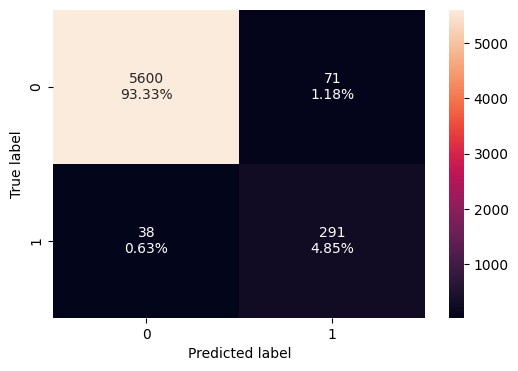

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGBoost_over_random, X_val, y_val)

**Observations for Tuned XGBoost Oversample model**
- The tuned XGBoost Oversample has a recall score of 100%, yet on validation recall has a score of .84.  
- Tuned XGBoost Oversample compared to XGBoost Oversampl
  - Default recall .99, Default validation recall .87
  - Tuned recall 1, tuned validation recall .88
- There is not much improvement after tuning, and still overfitting to the training set


### Tuning Random Forest model oversampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9823736436211773:


In [ ]:
# building model with best parameters
RandFor_over_random = RandomForestClassifier(
    n_estimators= 300,
    min_samples_leaf= 1,
    max_samples= 0.6,
    max_features= 'sqrt'

)

# Fit the model on oversampled training data
RandFor_over_random.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [ ]:
# Calculating different metrics on train set
RandFor_over_random_train = model_performance_classification_sklearn(
    RandFor_over_random, X_train, y_train
)
print("Training performance:")
RandFor_over_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,0.996,0.998


In [ ]:
# Calculating different metrics on validation set
RandFor_over_random_val = model_performance_classification_sklearn(RandFor_over_random, X_val, y_val)
print("Validation performance:")
RandFor_over_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.990,0.848,0.955,0.899


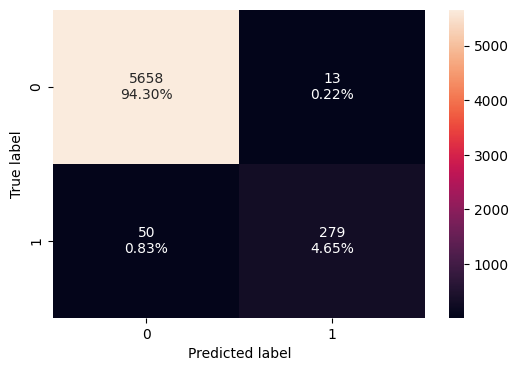

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(RandFor_over_random, X_val, y_val)

**Observations for Tuned Random Forest Oversample model**
- The Tuned Random Forest Oversample has a recall score of 1, and on validation recall has a score of ~.86.  Showing it is overfitting the training set.  
- Tuned Random Forest Oversample compared to Default Random Forest Oversample
  - Default recall .98, Default validation recall .84
  - Tuned recall 1, tuned validation recall .86
- The tuned random forest oversample performs slighlty better, but both models overfit to the training data

### Tuning Bagging model oversampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.9832057448585394:


In [ ]:
# building model with best parameters
Bagging_over_random = BaggingClassifier(
    n_estimators= 70,
    max_samples= 0.9,
    max_features= 0.9,
)

# Fit the model on oversampled training data
Bagging_over_random.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

In [ ]:
# Calculating different metrics on train set
Bagging_over_random_train = model_performance_classification_sklearn(
    Bagging_over_random, X_train, y_train
)
print("Training performance:")
Bagging_over_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Calculating different metrics on validation set
Bagging_over_random_val = model_performance_classification_sklearn(Bagging_over_random, X_val, y_val)
print("Validation performance:")
Bagging_over_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.985,0.839,0.885,0.861


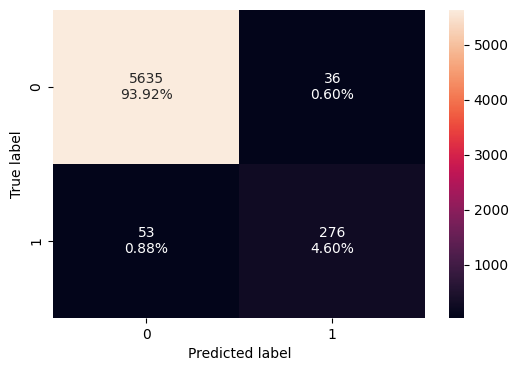

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(Bagging_over_random, X_val, y_val)


**Observations for Tuned Bagging Oversample model**
- The Tuned Bagging Oversample has a recall score of .99, and on validation recall has a score of .83.  
- Tuned Bagging Oversample compared to Default Bagging Oversample
  - Default recall .98, Default validation recall .81
  - Tuned recall 1, tuned validation recall .83
- The tuned model slightly increased the recall, but still is overfittig to the training set

### Tuning GBM model oversampled data

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9704971829220336:


In [ ]:
# building model with best parameters
GBM_over_random = GradientBoostingClassifier(
    subsample= 0.7,
    n_estimators= 125,
    max_features=0.5,
    learning_rate= 1,

)

# Fit the model on oversampled training set
GBM_over_random.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [ ]:
# Calculating different metrics on train set
GBM_over_random_train = model_performance_classification_sklearn(
    GBM_over_random, X_train, y_train
)
print("Training performance:")
GBM_over_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995,0.994,0.928,0.960


In [ ]:
# Calculating different metrics on validation set
GBM_over_random_val = model_performance_classification_sklearn(GBM_over_random, X_val, y_val)
print("Validation performance:")
GBM_over_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.968,0.818,0.666,0.734


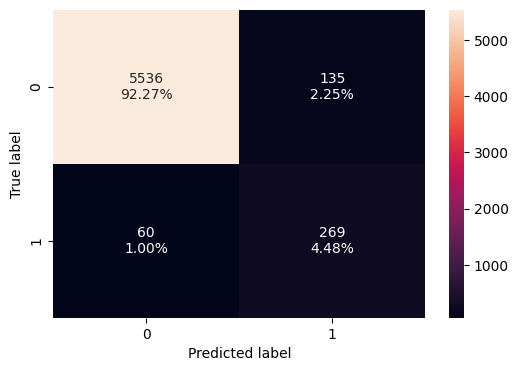

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_over_random, X_val, y_val)

**Observations for Tuned Gradient Boosting Oversample model**
- The Tuned Gradient Boosting Oversample has a recall score of .87, and on validation recall has a score of .68.  Showing it is now overfitting to the training set, unlike the default.
- Tuned Gradient Boosting Oversample compared to Default Gradient Boosting Oversample
  - Default recall .91, Default validation recall .88
  - Tuned recall ~.99, tuned validation recall .84
- The tuned model did increase the recall on the train set, but on the validation it decreased slightly.  It also seems now to overfit to the oversampled train set



###Tuning XGBoost with undersampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1, 0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9269965703086724:


In [ ]:
# building model with best parameters
XGBoost_under_random = XGBClassifier(
    random_state=1,
    subsample= 0.8,
    scale_pos_weight= 10,
    n_estimators= 200,
    learning_rate= 0.1,
    gamma= 5
)

# Fit the model on undersampled training data
XGBoost_under_random.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Calculating different metrics on train set
XGBoost_under_random_train = model_performance_classification_sklearn(
    XGBoost_under_random, X_train, y_train
)
print("Training performance:")
XGBoost_under_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.861,1.000,0.286,0.445


In [ ]:
# Calculating different metrics on validation set
XGBoost_under_random_val = model_performance_classification_sklearn(XGBoost_under_random, X_val, y_val)
print("Validation performance:")
XGBoost_under_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.840,0.918,0.244,0.386


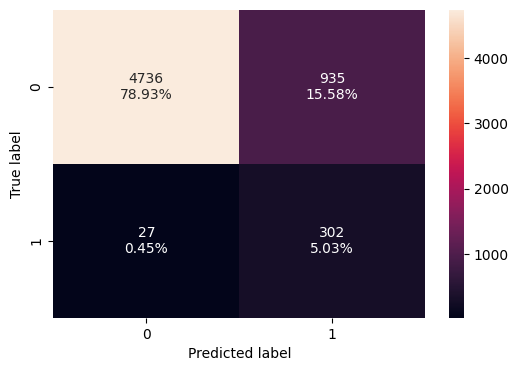

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(XGBoost_under_random, X_val, y_val)

**Observations for Tuned XGBoosting Undersample model**
- The Tuned XGBoost Undersample has a recall score of 100%, and on validation recall has a score of ~.92.   
- Tuned XGBoost Undersample compared to Default XGBoost Undersample
  - Default recall 1, Default validation recall .9
  - Tuned recall 1, tuned validation recall ~.92
- The default model did better on the validation set for recall, but not on the other metrics

###Tuning GBM with undersampled data

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.8924220153519518:


In [ ]:
# building model with best parameters
GBM_under_random = GradientBoostingClassifier(
    subsample= 0.7,
    n_estimators= 125,
    max_features= 0.5,
    learning_rate= 0.2
)
# Fit the model on undersampled training data
GBM_under_random.fit(X_train_under, y_train_under)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [ ]:
# Calculating different metrics on train set
GBM_under_random_train = model_performance_classification_sklearn(
   GBM_under_random, X_train, y_train
)
print("Training performance:")
GBM_under_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.957,0.995,0.566,0.721


In [ ]:
# Calculating different metrics on validation set
GBM_under_random_val = model_performance_classification_sklearn(GBM_under_random, X_val, y_val)
print("Validation performance:")
GBM_under_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.948,0.900,0.517,0.656


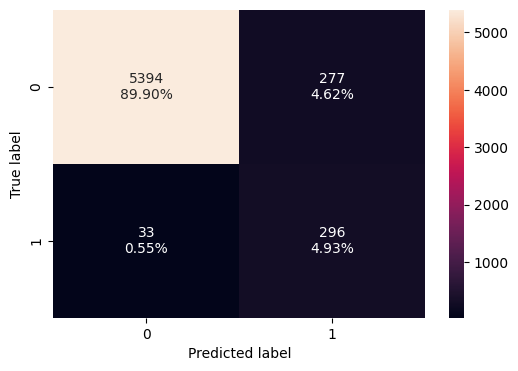

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_under_random, X_val, y_val)

**Observations for Tuned Gradient Boost Undersample model**
- The Tuned Gradient Boost Undersample has a recall score of ~.99, and on validation recall has a score of .89.   
- Tuned Gradient Boost Undersample compared to Default Gradient Boost Undersample
  - Default recall .94, Default validation recall .89
  - Tuned recall ~.99, tuned validation recall .89
- The tuned model stayed about the same on the validation recall, but now seems to be overfitting to the undersample training set

###Tuning Random Forest with undersampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.889857912787849:


In [ ]:
# building model with best parameters
RandFor_under_random = RandomForestClassifier(
    n_estimators= 300,
    min_samples_leaf= 1,
    max_samples=0.6,
    max_features= 'sqrt'
)

# Fit the model on undersampled training data
RandFor_under_random.fit(X_train_under, y_train_under)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [ ]:
# Calculating different metrics on train set
RandFor_under_random_train = model_performance_classification_sklearn(
   RandFor_under_random, X_train, y_train
)
print("Training performance:")
RandFor_under_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.967,0.977,0.633,0.768


In [ ]:
# Calculating different metrics on validation set
RandFor_under_random_val = model_performance_classification_sklearn(RandFor_under_random, X_val, y_val)
print("Validation performance:")
RandFor_under_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.957,0.888,0.567,0.692


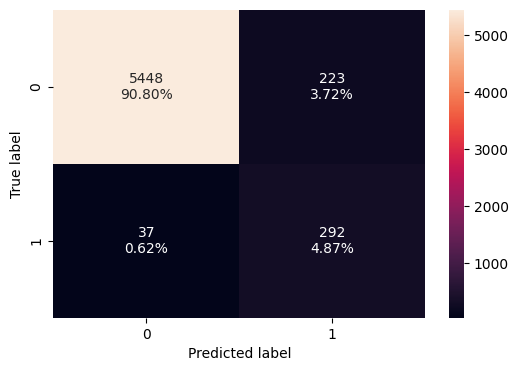

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(RandFor_under_random, X_val, y_val)

**Observations for Tuned Random Forest Undersample model**
- The Tuned Random Forest Undersample has a recall score of .98, and on validation recall has a score of .89.   
- Tuned Random Forest Undersample compared to Default Random Forest Undersample
  - Default recall 1, Default validation recall .88
  - Tuned recall .98, tuned validation recall .89
- The tuned model gives about the same metrics but now seems to cut down slightly on overfitting compared to the default

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        XGBoost_orig_random_train.T,
        XGBoost_over_random_train.T,
        RandFor_over_random_train.T,
        Bagging_over_random_train.T,
        GBM_over_random_train.T,
        XGBoost_under_random_train.T,
        GBM_under_random_train.T,
        RandFor_under_random_train.T,
    ], axis=1)

models_train_comp_df.columns = [
    "XGBoost Tuned with Random search",
    "XGBoost Oversample Tuned with Random search",
    "Random Forest Oversample Tuned with Random search",
    "Bagging Oversample Tuned with Random search",
    "Gradient Boosting Oversample Tuned with Random search",
    "XGBoost Undersample Tuned with Random search",
    "Gradient Boosting Undersample Tuned with Random search",
    "Random Forest Undersample Tuned with Random search"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Tuned with Random search,XGBoost Oversample Tuned with Random search,Random Forest Oversample Tuned with Random search,Bagging Oversample Tuned with Random search,Gradient Boosting Oversample Tuned with Random search,XGBoost Undersample Tuned with Random search,Gradient Boosting Undersample Tuned with Random search,Random Forest Undersample Tuned with Random search
Accuracy,0.999,0.999,1.000,1.000,0.995,0.861,0.957,0.967
Recall,1.000,1.000,1.000,1.000,0.994,1.000,0.995,0.977
Precision,0.985,0.982,0.996,1.000,0.928,0.286,0.566,0.633
F1,0.992,0.991,0.998,1.000,0.960,0.445,0.721,0.768


In [ ]:
# training performance comparison

models_val_comp_df = pd.concat(
    [
        XGBoost_orig_random_val.T,
        XGBoost_over_random_val.T,
        RandFor_over_random_val.T,
        Bagging_over_random_val.T,
        GBM_over_random_val.T,
        XGBoost_under_random_val.T,
        GBM_under_random_val.T,
        RandFor_under_random_val.T,
    ], axis=1)

models_val_comp_df.columns = [
    "XGBoost Tuned with Random search",
    "XGBoost Oversample Tuned with Random search",
    "Random Forest Oversample Tuned with Random search",
    "Bagging Oversample Tuned with Random search",
    "Gradient Boosting Oversample Tuned with Random search",
    "XGBoost Undersample Tuned with Random search",
    "Gradient Boosting Undersample Tuned with Random search",
    "Random Forest Undersample Tuned with Random search"
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost Tuned with Random search,XGBoost Oversample Tuned with Random search,Random Forest Oversample Tuned with Random search,Bagging Oversample Tuned with Random search,Gradient Boosting Oversample Tuned with Random search,XGBoost Undersample Tuned with Random search,Gradient Boosting Undersample Tuned with Random search,Random Forest Undersample Tuned with Random search
Accuracy,0.989,0.982,0.990,0.985,0.968,0.840,0.948,0.957
Recall,0.842,0.884,0.848,0.839,0.818,0.918,0.900,0.888
Precision,0.958,0.804,0.955,0.885,0.666,0.244,0.517,0.567
F1,0.896,0.842,0.899,0.861,0.734,0.386,0.656,0.692


**Ovservations of models**
- The `XGBoost Undersample Tuned with Random Search` gave the highest recall on validation set, but the other metrics are low especially the percision and F1 score.
- `Gradient Boosting Undersample Tuned with Random search` and `Random Forest Undersample Tuned with Random search` gave a recall score on validation of ~.90, but also have low percision score of ~50%
- `XGBoost Oversample Tuned with Random search` gave a recall score on validation of ~.88, and all other metrics are perform of above 80%
- `Random Forest Oversample Tuned with Random search` gave a recall score on validation of ~.85, and all other metrics above 90%

- The company is wanting to maximize the use of their generators so being able to correctly predict if a generator will fail or not is vital.  Reducing the false negatives, increasing Recall, is very important, but when the models are very close on scores with recall, then we would assume the company will want the other metrics as high as possible to reduce overall costs. This is why we are suggesting using the **Random Forest Oversample with Random Search**.  

### Test set final performance

In [ ]:
# Calculating different metrics on the test set with
# Random forest Oversample Tuned with Random search
XGBoost_under_random_test = model_performance_classification_sklearn(RandFor_over_random, X_test, y_test)
print("Test performance:")
XGBoost_under_random_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.840,0.937,0.886


- The performance on the Test data set is very similar to the validation set scores, showing this model is generalizing well, with a recall score of ~88%.
- Let's check the important features for the predicaion as per the final model

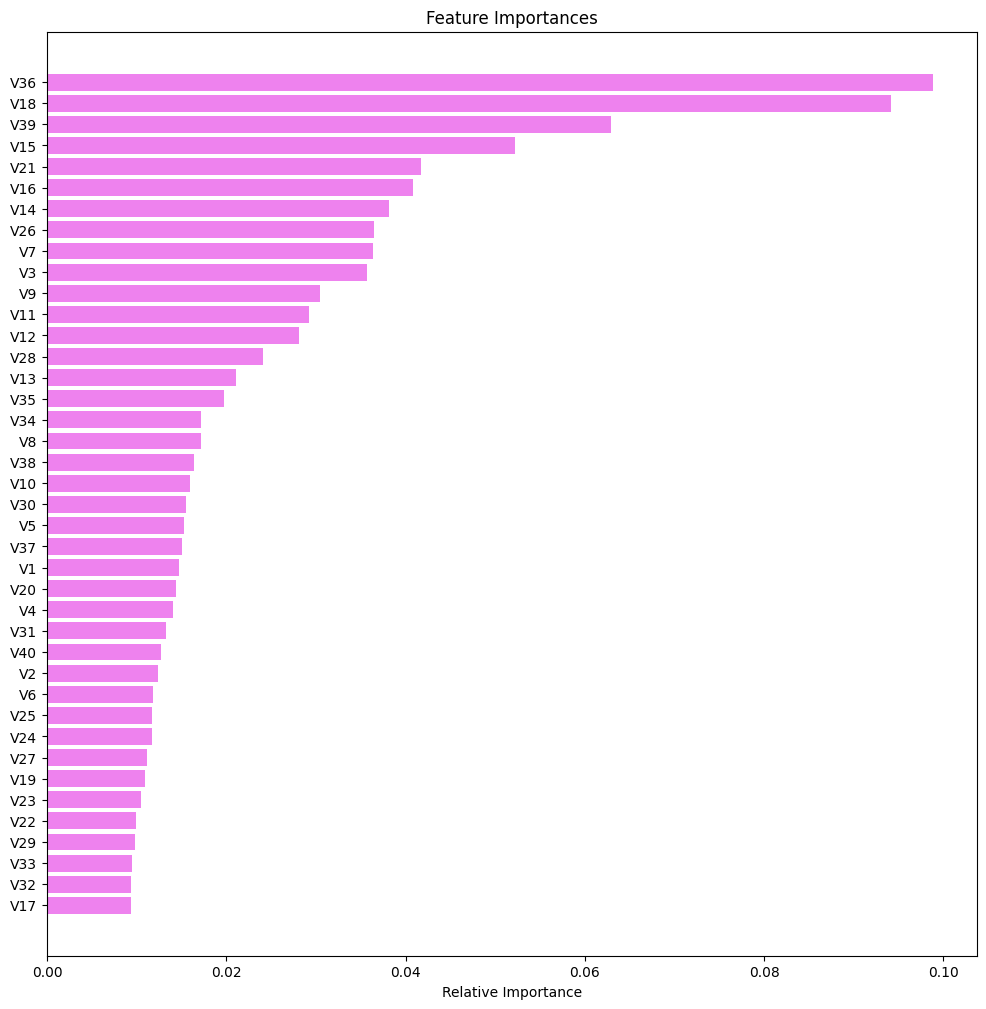

In [ ]:
feature_names = X.columns
importances = RandFor_over_random.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- (V18) Variable 18 is the number one important feature, followed by V36, and then V39.  
  - V15 and V21 round out the top 5 for important features.
- These top 5 features for this model, also had some of the strongest correlations with the target variable.

## Pipelines to build the final model


Now that we have a final model, we will use pipelines to pu the model into production.
All of the datatype in this data are numerical, so we do not have to use column transformer.

In [ ]:
# Separating target variable and other variables
X_train1 = data.drop("Target", axis=1)
y_train1 = data["Target"]

In [ ]:
# Usually we would split the dataset into training and test, but
# we have to seperate the dependent in the dataset for testing
# Thus we need to drop the target variable from the test set

# Seperating target variable (dependent) from other variables
X_test1 = data_test.drop(['Target'], axis=1)
y_test1 = data_test["Target"]

In [ ]:
#Taking care of any missing numeric values in dataset
imputer = SimpleImputer(strategy="median")
X_train1 = imputer.fit_transform(X_train1)


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train1 == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train1 == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over1, y_train_over1 = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over1 == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over1 == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over1.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over1.shape))

Before Oversampling, counts of label 'Yes': 1110
Before Oversampling, counts of label 'No': 18890 

After Oversampling, counts of label 'Yes': 13219
After Oversampling, counts of label 'No': 13219 

After Oversampling, the shape of train_X: (26438, 40)
After Oversampling, the shape of train_y: (26438,) 



In [ ]:
Final_pipeline_model = Pipeline(
    steps=[
        ('Random Forest',
             RandomForestClassifier(
                 n_estimators= 300,
                 min_samples_leaf= 1,
                 max_samples= 0.6,
                 max_features= 'sqrt',
                ),
            ),
        ],
    )
Final_pipeline_model.fit(X_train_over1, y_train_over1)

Pipeline(steps=[('Random Forest',
                 RandomForestClassifier(max_samples=0.6, n_estimators=300))])

In [ ]:
# Calculating different metrics on test set
Pipeline_Test_Score = model_performance_classification_sklearn(Final_pipeline_model, X_test, y_test)
print("Final Model performance on Test Dataset:")
Pipeline_Test_Score

Final Model performance on Test Dataset:


,Accuracy,Recall,Precision,F1
0,0.987,0.837,0.925,0.879


# Business Insights and Conclusions

**Variables observations- Important Features**
- `Variable 18` was the number one important feature on the model, which also had the highest negtive correlation with the target variable. This means this piece of equipment should be closely monitored.
  - V19 had a moderately strong negative correlation (-.69) with V18, thus would also be a good piece of equipment to monitor or see if this equipment counters V18.  
  - V34 and V7 have a moderate negative correlation (-.6) and(-56) respectively with V18, thus this would also be a good piece of equipment to monitor or to see if they counter V18.
  - V5, V22, V23, V33, V36, and V37 have weak moderate positive correlation (.36-.48)with V18.  Maybe these variables work with V18 thus when they are going poorly V18 is doing the same, so these would also be variables to monitor.   
- The next two top variables were `V36 and V39` have a moderately strong positive correlation(.75) with one another.  This makes me believe these two variables work together on the generator or are external factors which are correlated. These two features also had weak negative correlations with the target variable.
- The fourth and fifth important features `V15 and V21` both have a weak positive correlation with the target variable.
  - V15 has a strong positive correlation (.87) with variable V7, so this might need to be looked into to see if the one variable can help determine if a generator will fail.
  - V21 has a strong positive correlation (.84) with varialbe V16, so this might need to be looked into to see if the one variable can help determine if a generator will fail.


**Model Conclusion and Recommendations**
- With the generators only failing around 5.6% of the time it is critical to make sure we identify the variables that lead to a generator failing and catch it before it fails.  Thus, this would reduce time when the generator is down and overall costs to the company. This is why the company is most interested in the recall score, but they also want to make sure they get the other predictions correct as well, and this is why going with the **Random Forest Oversample with Random Search** is the best model.
- The model generalizes well, as can be seen in the validation and test metrics.
- If the company was willing to have a lower other metrics and only cared about the recall because of a cost factor, then they could choose the `XGBoost Undersample Tuned with Random Search` to slightly increase the recall score, but would compromise the other metrics. Knowing the costs of each would allow us to make a better decision on which model would be best to use.  

- Gaining more information on the variables above would lead to making a better model to predict better on all accounts.  Thus, further research should be put into finding all the variables that are surrounding the top important features, and when they meet a certain threshold the generators should be inspected and thus further reducing the chance of a generator failing, and saving the company more money.   


***